In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load all sheets from Excel file

socio21_22 = pd.ExcelFile("C:/Users/g.bouwou/OneDrive/DEVELOPPEMENT COMMUNAUTAIRE 21-22/SOCIO-ECO 21-22(1).xlsx")

In [3]:
# First group of socio-eco sheets
selected_sheetssocio21_22 = ["SOCIO-ECO(1)", "SOCIO-ECO(2)"]  


# Read and concatenate
df_listsocio21_22 = [socio21_22.parse(name) for name in selected_sheetssocio21_22]
dfsocio21_22 = pd.concat(df_listsocio21_22, ignore_index=True)

In [4]:
socio21_222 = pd.ExcelFile("C:/Users/g.bouwou/OneDrive/DEVELOPPEMENT COMMUNAUTAIRE 21-22/SOCIO-ECO 21-22(2).xlsx")

In [5]:
# Second group of sheets
selected_sheetssocio2 = ["SOCIO-ECO(1)", "SOCIO-ECO(2)"]
df_listsocio2 = [socio21_222.parse(name) for name in selected_sheetssocio2]
df_more = pd.concat(df_listsocio2, ignore_index=True)  # another batch of data

In [6]:
# Append to the original dfsocio
dfsocio = pd.concat([dfsocio21_22, df_more], ignore_index=True)

In [7]:
dfsocio_22 = pd.concat([dfsocio21_22, df_more], ignore_index=True)

In [8]:
socio22_23 = pd.ExcelFile("C:/Users/g.bouwou/OneDrive/DEVELOPPEMENT COMMUNAUTAIRE 22-23/SOCIO-ECO 22-23.xlsx")

In [9]:
# Third group of sheets
selected_sheetssocio3 = ["SOCIO-ECO"]
df_socio3 = socio22_23.parse("SOCIO-ECO")


In [10]:
# Then concatenate it with the previous one
dfsocio = pd.concat([dfsocio, df_socio3], ignore_index=True)


In [11]:
dfsocio_23 = socio22_23.parse("SOCIO-ECO")

In [12]:
socio23_24 = pd.ExcelFile("C:/Users/g.bouwou/OneDrive/DEVELOPPEMENT COMMUNAUTAIRE 23-24/SOCIO-ECO 23-24.xlsx")


In [13]:
#Fourth group of sheets
selected_sheetssocio4 = ["SOCIO-ECO(1)","SOCIO-ECO(2)"]
df_listsocio3 = [socio23_24.parse(name) for name in selected_sheetssocio4]
df_more = pd.concat(df_listsocio3, ignore_index=True)  # another batch of data


In [14]:
# Append to the original dfsocio
dfsocio = pd.concat([dfsocio, df_more], ignore_index=True)


In [15]:
dfsocio_24 = pd.concat(df_listsocio3, ignore_index=True)

In [16]:
# Load all sheets from Excel file

hh21_22 = pd.ExcelFile("C:/Users/g.bouwou/OneDrive/DEVELOPPEMENT COMMUNAUTAIRE 21-22/CLMRS Household profiling 21-22.xlsx")

In [17]:
# First group of HH profiling sheets(hh profiling 21-22)
selected_sheetshh21_22 = ["CLMRS HH 21-22(1)", "CLMRS HH 21-22(2)","CLMRS HH 21-22(3)","CLMRS HH 21-22(4)"]  
selected_sheetshhc21_22 = ["ROSTER_CHILDREN(1)", "ROSTER_CHILDREN(2)","ROSTER_CHILDREN(3)","ROSTER_CHILDREN(4)"]  
selected_sheetshhh21_22 = ["ROSTER_HEAVY(1)", "ROSTER_HEAVY(2)","ROSTER_HEAVY(3)","ROSTER_HEAVY(4)"] 
selected_sheetshhl21_22 = ["ROSTER_WORKLIGHT(1)", "ROSTER_WORKLIGHT(2)","ROSTER_WORKLIGHT(3)","ROSTER_WORKLIGHT(4)"] 


# Read and concatenate
df_listhh21_22 = [hh21_22.parse(name) for name in selected_sheetshh21_22]

df_listhhc21_22 = [hh21_22.parse(name) for name in selected_sheetshhc21_22]

df_listhhh21_22 = [hh21_22.parse(name) for name in selected_sheetshhh21_22]

df_listhhl21_22 = [hh21_22.parse(name) for name in selected_sheetshhl21_22]

dfhh22 = pd.concat(df_listhh21_22, ignore_index=True)

dfhhc22 = pd.concat(df_listhhc21_22, ignore_index=True)

dfhhh22 = pd.concat(df_listhhh21_22, ignore_index=True)

dfhhl22 = pd.concat(df_listhhl21_22, ignore_index=True)

In [18]:
# Then create a copy
dfhh_22 =dfhh22
dfhhc_22 = dfhhc22
dfhhh_22 = dfhhh22
dfhhl_22 = dfhhl22

In [19]:
dfhhc_22['child_idc'] = dfhhc_22['interview__id'] + '-C' + dfhhc_22['ROSTER_CHILDREN__id'].astype(str)
dfhhh_22['child_idh'] = dfhhh_22['interview__id'] + '-C' + dfhhh_22['ROSTER_CHILDREN__id'].astype(str)
dfhhl_22['child_idl'] = dfhhl_22['interview__id'] + '-C' + dfhhl_22['ROSTER_CHILDREN__id'].astype(str)

In [20]:
dfhhc_22['child_idc'] = dfhhc_22['child_idc'].astype(str).str.strip()
dfhhh_22['child_idh'] = dfhhh_22['child_idh'].astype(str).str.strip()

In [21]:
# This step is not necessary because we will create the child labor indicator ignoring part of the code. I just wanted to see how many children 
# are in the heavy roster, I mean how many matching when you take the child roster and the heavy one.


heavy_ids = set(dfhhh_22['child_idh'])

In [22]:
match_count = dfhhc_22['child_idc'].isin(heavy_ids).sum()
print(f"{match_count} child_idc values found in heavy_ids.")

10013 child_idc values found in heavy_ids.


In [23]:
# Step 1: Create sets of child_ids from dfhhh and dfhhl

heavy_ids = set(dfhhh_22['child_idh'])

light_work_ids = set(dfhhl_22['child_idl'])

In [24]:
# Step 2: Prepare a mapping of hours worked from dfhhl
# We ensure those columns are numeric

dfhhl_22['worklight_hours_schl'] = pd.to_numeric(dfhhl_22['worklight_hours_schl'], errors='coerce')
dfhhl_22['worklight_hours_we'] = pd.to_numeric(dfhhl_22['worklight_hours_we'], errors='coerce')

In [25]:
# Set child_id as index for mapping
work_hours_map = dfhhl_22.set_index('child_idl')[['worklight_hours_schl', 'worklight_hours_we']]


In [26]:
work_hours_map

,worklight_hours_schl,worklight_hours_we
child_idl,,
4a95fa3b869343579c5cc9bbb00244b4-C1,1.0,6.0
c27def4c654c4392a8b28c17a6b0de35-C1,3.0,7.0
28f9755e882242eca0d6cd6950bd7a13-C1,0.0,0.0
28f9755e882242eca0d6cd6950bd7a13-C2,0.0,0.0
730d64d541134d87970109ea8897d9b9-C1,0.0,2.0
...,...,...
d2f64ff27d384c77a16f3f9156f73ccb-C1,0.0,1.0
46015944dcf54f5584b4c59e832d2016-C1,0.0,1.0
07ef509e7b734728a64eff47b0eede83-C1,0.0,1.0


In [27]:
# Step 3: Merge the hours info into dfhhc based on child_id (only brings in if exists)
dfhhc_22 = dfhhc_22.merge(work_hours_map, how='left', left_on='child_idc', right_index=True)

In [28]:
# Step 4: Define the child labor rule
def is_child_labor(row):
    age = row['child_age']
    cid = row['child_idc']
    hours_week = row.get('worklight_hours_schl', 0) or 0.0
    hours_weekend = row.get('worklight_hours_we', 0) or 0.0
    total_hours = hours_week + hours_weekend

    if (cid in heavy_ids) or ((cid in light_work_ids) and age < 13) or (age >= 13 and (hours_week > 2.0 or hours_weekend > 4.0 or total_hours >= 10.0)):
        return 'CL'
    else:
        return 'NoCL'

In [29]:
# Step 5: Apply logic
dfhhc_22['child_labor'] = dfhhc_22.apply(is_child_labor, axis=1)


In [30]:
# Step 6: Create a household-level child labor indicator from dfhhc
# We'll flag households where at least one child is in child labor

dfhhc_22['child_labor_flag'] = dfhhc_22['child_labor'] == 'CL'

In [31]:
# Group by interview__id and check if any child is in labor
hh_child_labor = dfhhc_22.groupby('interview__id')['child_labor_flag'].any().reset_index()


In [32]:
# Convert the boolean to 'Yes'/'No' or keep as boolean
hh_child_labor['child_labor_household'] = hh_child_labor['child_labor_flag'].map({True: 'Yes', False: 'No'})

In [33]:
# Step 7: Merge into dfhh
dfhh_22 = dfhh_22.merge(hh_child_labor[['interview__id', 'child_labor_household']], on='interview__id', how='left')

In [34]:
# Optional: Fill NaN with 'No' if households without children should be considered as having no child labor
dfhh_22['child_labor_household'] = dfhh_22['child_labor_household'].fillna('No')


In [35]:
df_summary22 = dfhh_22[['interview__id', 'farmer_code', 'child_labor_household']].copy()


In [36]:
df_summary22

,interview__id,farmer_code,child_labor_household
0,b5145f8acff24a969667fc7d8ff0925f,CIV-NAW-SC120484-009-0039,No
1,e9729951a12b48f39b8036b2b3bf18aa,CIV-NAW-SC120484-009-0004,No
2,4a95fa3b869343579c5cc9bbb00244b4,CIV-GOH-SC090372-002-0124,Yes
3,c27def4c654c4392a8b28c17a6b0de35,CIV-NAW-SC120162-004-0383,Yes
4,09c175e1f5fc45f1817e25c72b91111f,CIV-GOH-SC090372-005-0045,No
...,...,...,...
51728,d2f64ff27d384c77a16f3f9156f73ccb,1,Yes
51729,46015944dcf54f5584b4c59e832d2016,1,Yes
51730,07ef509e7b734728a64eff47b0eede83,1,Yes
51731,ac008c827b814fa7b255e5e0a4ff35eb,1,Yes


In [37]:
df_joined22 = pd.merge(df_summary22, dfsocio_22, left_on='farmer_code', right_on='farmer_code_touton', how='inner')


In [38]:
df_joined22

,interview__id_x,farmer_code,child_labor_household,index,interview__key,interview__id_y,enumerator,country,region,cooperative,...,access_care_no__n999,access_care_no_other,primary_school,secondary_school,sssys_irnd,has__errors,interview__status,assignment__id,start_date,outside_dependent__n999
0,e9729951a12b48f39b8036b2b3bf18aa,CIV-NAW-SC120484-009-0004,No,551,29-62-00-51,7d423957045243cf8d917092d1207c5e,KOUAKOU KONAN GUILLAUME,COTE D'IVOIRE,NAWA,S.C.P.K COOP-CA,...,NaN,NaN,Entre 10 et 30 minutes,Il n'y a pas de collège accessible à pied dans...,0.431995,0,Completed,215673,2022-04-07T18:17:37,0.0
1,3559a7fb977c412686c5ee59414f6055,CIV-NAW-SC120235-010-0120,No,1167,07-44-39-58,e73b7fbe2cda4f67b0340222a0585e4d,KOUADIO JEAN CEDRIC SYLVERE,COTE D'IVOIRE,NAWA,SOCAET2,...,NaN,NaN,Plus de 30 minutes mais moins d'1h,Plus de 30 minutes mais moins d'1h,0.830520,0,Completed,157623,NaN,NaN
2,7c3fc2939f434053a3f08caedd1fd59a,CIV-CAV-SC080957-006-0094,No,1974,68-99-02-03,6120fadf33bc42ee930ffc6e01e0a5c7,DAGO GNAMIEN ASHLEY,COTE D'IVOIRE,CAVALLY,COOP-CA-ECABLO,...,NaN,NaN,Plus de 30 minutes mais moins d'1h,Il n'y a pas de collège accessible à pied dans...,0.316526,0,Completed,182860,2022-02-04T13:27:19,0.0
3,61c65a302136437ba626e9ac2feea150,CIV-CAV-SC080957-006-0105,No,1799,06-46-64-98,302cb9716204432b9dace7c9e6c6932f,DAGO GNAMIEN ASHLEY,COTE D'IVOIRE,CAVALLY,COOP-CA-ECABLO,...,NaN,NaN,Plus de 30 minutes mais moins d'1h,Il n'y a pas de collège accessible à pied dans...,0.138549,0,Completed,182899,2022-02-06T06:27:50,0.0
4,8dd2e35b60af4abab36e32eda8fd9109,CIV-CAV-SC080957-006-0102,No,1691,81-57-09-36,597f7fd06c104d6cbd73e4c87f8d6758,DAGO GNAMIEN ASHLEY,COTE D'IVOIRE,CAVALLY,COOP-CA-ECABLO,...,NaN,NaN,Plus de 30 minutes mais moins d'1h,Il n'y a pas de collège accessible à pied dans...,0.438819,0,Completed,182886,2022-02-06T10:42:42,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7845,a0c4f89ef783412eb6d6213ea5a5d36b,CIV-CAV-SC080957-006-0187,No,1997,22-78-10-71,ed28346d58a54e58a8b0167ef3ab228a,DAGO GNAMIEN ASHLEY,COTE D'IVOIRE,CAVALLY,COOP-CA-ECABLO,...,NaN,NaN,Plus de 30 minutes mais moins d'1h,Il n'y a pas de collège accessible à pied dans...,0.515752,0,Completed,182875,2022-02-08T07:13:58,0.0
7846,a555591944594acda65ee7f135d53e54,CIV-CAV-SC080957-005-0088,Yes,1386,25-71-85-52,e13b629ebd82419cae88232ab21bdc2c,KOUADIO KONAN HYPPOLITE,COTE D'IVOIRE,CAVALLY,COOP-CA-ECABLO,...,0.0,NaN,Entre 10 et 30 minutes,Il n'y a pas de collège accessible à pied dans...,0.466654,0,Completed,183040,2022-02-06T08:43:39,NaN
7847,aee4a226bd6b46318ac9e1b49bb2abe2,CIV-CAV-SC080957-006-0028,No,1265,68-20-62-53,0d783187a13b440fa7fa83d30633c32e,KOUADIO KONAN HYPPOLITE,COTE D'IVOIRE,CAVALLY,COOP-CA-ECABLO,...,NaN,NaN,Moins de 10 minutes,Il n'y a pas de collège accessible à pied dans...,0.882502,0,Completed,182992,2022-02-08T09:47:06,NaN
7848,b115f2cf49604d87ba178f9d6b49bd83,CIV-CAV-SC080957-006-0020,No,1346,79-61-35-63,dc09975b89514d7d8ea2659b3856aae8,KOUADIO KONAN HYPPOLITE,COTE D'IVOIRE,CAVALLY,COOP-CA-ECABLO,...,NaN,NaN,Moins de 10 minutes,Il n'y a pas de collège accessible à pied dans...,0.916771,0,Completed,183016,2022-02-08T07:02:29,0.0


In [39]:
df_joined_unique22 = df_joined22.drop_duplicates(subset='farmer_code', keep='first')


In [40]:
df_joined_unique22

,interview__id_x,farmer_code,child_labor_household,index,interview__key,interview__id_y,enumerator,country,region,cooperative,...,access_care_no__n999,access_care_no_other,primary_school,secondary_school,sssys_irnd,has__errors,interview__status,assignment__id,start_date,outside_dependent__n999
0,e9729951a12b48f39b8036b2b3bf18aa,CIV-NAW-SC120484-009-0004,No,551,29-62-00-51,7d423957045243cf8d917092d1207c5e,KOUAKOU KONAN GUILLAUME,COTE D'IVOIRE,NAWA,S.C.P.K COOP-CA,...,NaN,NaN,Entre 10 et 30 minutes,Il n'y a pas de collège accessible à pied dans...,0.431995,0,Completed,215673,2022-04-07T18:17:37,0.0
1,3559a7fb977c412686c5ee59414f6055,CIV-NAW-SC120235-010-0120,No,1167,07-44-39-58,e73b7fbe2cda4f67b0340222a0585e4d,KOUADIO JEAN CEDRIC SYLVERE,COTE D'IVOIRE,NAWA,SOCAET2,...,NaN,NaN,Plus de 30 minutes mais moins d'1h,Plus de 30 minutes mais moins d'1h,0.830520,0,Completed,157623,NaN,NaN
2,7c3fc2939f434053a3f08caedd1fd59a,CIV-CAV-SC080957-006-0094,No,1974,68-99-02-03,6120fadf33bc42ee930ffc6e01e0a5c7,DAGO GNAMIEN ASHLEY,COTE D'IVOIRE,CAVALLY,COOP-CA-ECABLO,...,NaN,NaN,Plus de 30 minutes mais moins d'1h,Il n'y a pas de collège accessible à pied dans...,0.316526,0,Completed,182860,2022-02-04T13:27:19,0.0
3,61c65a302136437ba626e9ac2feea150,CIV-CAV-SC080957-006-0105,No,1799,06-46-64-98,302cb9716204432b9dace7c9e6c6932f,DAGO GNAMIEN ASHLEY,COTE D'IVOIRE,CAVALLY,COOP-CA-ECABLO,...,NaN,NaN,Plus de 30 minutes mais moins d'1h,Il n'y a pas de collège accessible à pied dans...,0.138549,0,Completed,182899,2022-02-06T06:27:50,0.0
4,8dd2e35b60af4abab36e32eda8fd9109,CIV-CAV-SC080957-006-0102,No,1691,81-57-09-36,597f7fd06c104d6cbd73e4c87f8d6758,DAGO GNAMIEN ASHLEY,COTE D'IVOIRE,CAVALLY,COOP-CA-ECABLO,...,NaN,NaN,Plus de 30 minutes mais moins d'1h,Il n'y a pas de collège accessible à pied dans...,0.438819,0,Completed,182886,2022-02-06T10:42:42,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7843,928f4aa666bb4604bb7fa70e920907c1,CIV-CAV-SC080957-004-0249,No,3229,96-70-34-56,3175724eb59b48f4a91c94aac7641461,YAO-KOUADIO JEAN-JACQUES AUBAIN,COTE D'IVOIRE,CAVALLY,COOP-CA-ECABLO,...,NaN,NaN,Moins de 10 minutes,Il n'y a pas de collège accessible à pied dans...,0.380634,0,Completed,183282,2022-02-08T14:47:03,0.0
7844,92db66aa37db4735805b77b159d7ab2b,CIV-CAV-SC080957-006-0004,No,1406,49-20-61-85,562ae0ed21484b589609010a4e26fb28,KOUADIO KONAN HYPPOLITE,COTE D'IVOIRE,CAVALLY,COOP-CA-ECABLO,...,NaN,NaN,Moins de 10 minutes,Il n'y a pas de collège accessible à pied dans...,0.273279,0,Completed,183081,2022-02-07T06:56:20,0.0
7845,a0c4f89ef783412eb6d6213ea5a5d36b,CIV-CAV-SC080957-006-0187,No,1997,22-78-10-71,ed28346d58a54e58a8b0167ef3ab228a,DAGO GNAMIEN ASHLEY,COTE D'IVOIRE,CAVALLY,COOP-CA-ECABLO,...,NaN,NaN,Plus de 30 minutes mais moins d'1h,Il n'y a pas de collège accessible à pied dans...,0.515752,0,Completed,182875,2022-02-08T07:13:58,0.0
7847,aee4a226bd6b46318ac9e1b49bb2abe2,CIV-CAV-SC080957-006-0028,No,1265,68-20-62-53,0d783187a13b440fa7fa83d30633c32e,KOUADIO KONAN HYPPOLITE,COTE D'IVOIRE,CAVALLY,COOP-CA-ECABLO,...,NaN,NaN,Moins de 10 minutes,Il n'y a pas de collège accessible à pied dans...,0.882502,0,Completed,182992,2022-02-08T09:47:06,NaN


In [41]:
df_joined_unique22.describe(include='all')

,interview__id_x,farmer_code,child_labor_household,index,interview__key,interview__id_y,enumerator,country,region,cooperative,...,access_care_no__n999,access_care_no_other,primary_school,secondary_school,sssys_irnd,has__errors,interview__status,assignment__id,start_date,outside_dependent__n999
count,5850,5850,5850,5850.000000,5850,5850,5850,5850,5850,5850,...,897.0,0.0,5839,5839,5850.000000,5850.0,5850,5850.000000,4253,3277.0
unique,5850,5850,2,NaN,5850,5850,53,2,11,19,...,NaN,NaN,5,5,NaN,NaN,2,NaN,4247,NaN
top,e9729951a12b48f39b8036b2b3bf18aa,CIV-NAW-SC120484-009-0004,No,NaN,29-62-00-51,7d423957045243cf8d917092d1207c5e,OKOU DIDIER MAHI CESAR,COTE D'IVOIRE,GUEMON,COOPRAMA-CA,...,NaN,NaN,Moins de 10 minutes,Il n'y a pas de collège accessible à pied dans...,NaN,NaN,Completed,NaN,2022-09-04T08:56:23,NaN
freq,1,1,4774,NaN,1,1,353,5849,1216,733,...,NaN,NaN,2641,2778,NaN,NaN,5767,NaN,2,NaN
mean,NaN,NaN,NaN,1661.634359,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.496474,0.0,NaN,187456.766838,NaN,0.0
std,NaN,NaN,NaN,1257.522350,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.287409,0.0,NaN,32752.963542,NaN,0.0
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.000009,0.0,NaN,155946.000000,NaN,0.0
25%,NaN,NaN,NaN,655.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.245606,0.0,NaN,158873.250000,NaN,0.0
50%,NaN,NaN,NaN,1376.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.487851,0.0,NaN,183756.500000,NaN,0.0
75%,NaN,NaN,NaN,2445.250000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.747508,0.0,NaN,188460.750000,NaN,0.0


In [42]:
hh22_23 = pd.ExcelFile("C:/Users/g.bouwou/OneDrive/DEVELOPPEMENT COMMUNAUTAIRE 22-23/CLMRS Household Profiling 22-23.xlsx")

In [43]:
# Second group of HH profiling sheets
selected_sheetshh22_23 = ["HH_profiling(1)", "HH_profiling(2)","HH_profiling(3)","HH_profiling(4)"]  
selected_sheetshhc22_23 = ["ROSTER_CHILDREN(1)", "ROSTER_CHILDREN(2)","ROSTER_CHILDREN(3)","ROSTER_CHILDREN(4)"]  
selected_sheetshhh22_23 = ["ROSTER_HEAVY(1)", "ROSTER_HEAVY(2)","ROSTER_HEAVY(3)","ROSTER_HEAVY(4)"] 
selected_sheetshhl22_23 = ["ROSTER_WORKLIGHT(1)", "ROSTER_WORKLIGHT(2)","ROSTER_WORKLIGHT(3)","ROSTER_WORKLIGHT(4)"] 

In [44]:
# Read and concatenate
df_listhh22_23 = [hh22_23.parse(name) for name in selected_sheetshh22_23]

df_listhhc22_23 = [hh22_23.parse(name) for name in selected_sheetshhc22_23]

df_listhhh22_23 = [hh22_23.parse(name) for name in selected_sheetshhh22_23]

df_listhhl22_23 = [hh22_23.parse(name) for name in selected_sheetshhl22_23]

dfhh23 = pd.concat(df_listhh22_23, ignore_index=True)

dfhhc23 = pd.concat(df_listhhc22_23, ignore_index=True)

dfhhh23 = pd.concat(df_listhhh22_23, ignore_index=True)

dfhhl23 = pd.concat(df_listhhl22_23, ignore_index=True)

In [45]:
# Then create a copy
dfhh_23 = dfhh23
dfhhc_23 = dfhhc23
dfhhh_23 = dfhhh23
dfhhl_23 = dfhhl23

In [46]:
dfhhc_23['child_idc'] = dfhhc_23['interview__id'] + '-C' + dfhhc_23['ROSTER_CHILDREN__id'].astype(str)
dfhhh_23['child_idh'] = dfhhh_23['interview__id'] + '-C' + dfhhh_23['ROSTER_CHILDREN__id'].astype(str)
dfhhl_23['child_idl'] = dfhhl_23['interview__id'] + '-C' + dfhhl_23['ROSTER_CHILDREN__id'].astype(str)

In [47]:
dfhhc_23['child_idc'] = dfhhc_23['child_idc'].astype(str).str.strip()
dfhhh_23['child_idh'] = dfhhh_23['child_idh'].astype(str).str.strip()

In [48]:
heavy_ids = set(dfhhh_23['child_idh'])

In [49]:
match_count = dfhhc_23['child_idc'].isin(heavy_ids).sum()
print(f"{match_count} child_idc values found in heavy_ids.")

10013 child_idc values found in heavy_ids.


In [50]:
# Step 1: Create sets of child_ids from dfhhh and dfhhl
heavy_ids = set(dfhhh_23['child_idh'])
light_work_ids = set(dfhhl_23['child_idl'])

In [51]:
# Step 2: Prepare a mapping of hours worked from dfhhl
# Ensure those columns are numeric
dfhhl_23['worklight_hours_schl'] = pd.to_numeric(dfhhl_23['worklight_hours_schl'], errors='coerce')
dfhhl_23['worklight_hours_we'] = pd.to_numeric(dfhhl_23['worklight_hours_we'], errors='coerce')

In [52]:
# Set child_id as index for mapping
work_hours_map = dfhhl_23.set_index('child_idl')[['worklight_hours_schl', 'worklight_hours_we']]


In [53]:
work_hours_map

,worklight_hours_schl,worklight_hours_we
child_idl,,
4a95fa3b869343579c5cc9bbb00244b4-C1,1.0,6.0
c27def4c654c4392a8b28c17a6b0de35-C1,3.0,7.0
28f9755e882242eca0d6cd6950bd7a13-C1,0.0,0.0
28f9755e882242eca0d6cd6950bd7a13-C2,0.0,0.0
730d64d541134d87970109ea8897d9b9-C1,0.0,2.0
...,...,...
d2f64ff27d384c77a16f3f9156f73ccb-C1,0.0,1.0
46015944dcf54f5584b4c59e832d2016-C1,0.0,1.0
07ef509e7b734728a64eff47b0eede83-C1,0.0,1.0


In [54]:
# Step 3: Merge the hours info into dfhhc based on child_id (only brings in if exists)
dfhhc_23 = dfhhc_23.merge(work_hours_map, how='left', left_on='child_idc', right_index=True)


In [55]:
# Step 4: Apply logic
dfhhc_23['child_labor'] = dfhhc_23.apply(is_child_labor, axis=1)


In [56]:
# Step 5: Create a household-level child labor indicator from dfhhc
# We'll flag households where at least one child is in child labor

dfhhc_23['child_labor_flag'] = dfhhc_23['child_labor'] == 'CL'

In [57]:
# Group by interview__id and check if any child is in labor
hh_child_labor = dfhhc_23.groupby('interview__id')['child_labor_flag'].any().reset_index()

In [58]:
# Convert the boolean to 'Yes'/'No' or keep as boolean
hh_child_labor['child_labor_household'] = hh_child_labor['child_labor_flag'].map({True: 'Yes', False: 'No'})

In [59]:
# Step 6: Merge into dfhh
dfhh_23 = dfhh_23.merge(hh_child_labor[['interview__id', 'child_labor_household']], on='interview__id', how='left')

In [60]:
# Optional: Fill NaN with 'No' if households without children should be considered as having no child labor
dfhh_23['child_labor_household'] = dfhh_23['child_labor_household'].fillna('No')


In [61]:
df_summary23 = dfhh_23[['interview__id', 'farmer_code', 'child_labor_household']].copy()

In [62]:
df_summary23

,interview__id,farmer_code,child_labor_household
0,b5145f8acff24a969667fc7d8ff0925f,CIV-NAW-SC120484-009-0039,No
1,e9729951a12b48f39b8036b2b3bf18aa,CIV-NAW-SC120484-009-0004,No
2,4a95fa3b869343579c5cc9bbb00244b4,CIV-GOH-SC090372-002-0124,Yes
3,c27def4c654c4392a8b28c17a6b0de35,CIV-NAW-SC120162-004-0383,Yes
4,09c175e1f5fc45f1817e25c72b91111f,CIV-GOH-SC090372-005-0045,No
...,...,...,...
51728,d2f64ff27d384c77a16f3f9156f73ccb,1,Yes
51729,46015944dcf54f5584b4c59e832d2016,1,Yes
51730,07ef509e7b734728a64eff47b0eede83,1,Yes
51731,ac008c827b814fa7b255e5e0a4ff35eb,1,Yes


In [63]:
df_joined23 = pd.merge(df_summary23, dfsocio_23, left_on='farmer_code', right_on='farmer_code_touton', how='inner')

In [64]:
df_joined23

,interview__id_x,farmer_code,child_labor_household,index,interview__key,interview__id_y,enumerator,country,region,cooperative,...,hh_location__Accuracy,hh_location__Altitude,hh_location__Timestamp,location_gps_point,location_gps_other,end_date,sssys_irnd,has__errors,interview__status,assignment__id
0,28f9755e882242eca0d6cd6950bd7a13,CIV-NAW-SC120162-005-0269,Yes,19171,39-15-53-44,df2119ed59f64a2c9e45685f8d5491ce,DIOMANDE SOUALIO,COTE D'IVOIRE,NAWA,COOP-CA-ECAPR,...,5.3,198.1,2023-01-27T09:56:17,Au village,NaN,2023-01-25T14:43:13,0.632367,0,Completed,412126
1,9b5395d58df445498c8ce698f90eac7d,CIV-GOH-SC090372-003-0137,No,2961,00-09-82-30,1493bf08a8224b77ba0602660210f3b2,IRIE LOU IRIE SIDONIE,COTE D'IVOIRE,GOH,CAJPG-SCOOPS,...,11.2,225.8,2022-12-09T05:47:31,Chez le PR,NaN,2022-12-12T11:44:18,0.520279,0,Completed,330800
2,3fb983de6aec47609e101d24bb84f61a,CIV-AGN-SC020049-007-0154,No,4272,75-67-93-75,0866a234fd58417ba53201e379be2486,DAGO GNAMIEN ASHLEY,COTE D'IVOIRE,AGNEBY-TIASSA,CAYSI-SCOOPS,...,5.6,145.3,2022-11-19T16:06:41,Autre,CHEZ LE CHEF DE CAMPEMENT COMMUNAUTAIRE,2022-11-19T16:12:47,0.221583,0,Completed,320333
3,501aa0d8ec354b089b9c4251a24f0a67,CIV-AGN-SC020049-007-0070,No,332,28-97-78-30,51cf9fa03e65430fb3be955e76d794cb,DAGO GNAMIEN ASHLEY,COTE D'IVOIRE,AGNEBY-TIASSA,CAYSI-SCOOPS,...,7.0,84.1,2022-11-21T15:56:08,Dans l'habitation du producteur,NaN,2022-11-21T15:56:12,0.272045,0,Completed,320144
4,454863cbb6e8431e97b58e9cf230159f,CIV-AGN-SC020049-007-0168,No,352,86-32-91-59,c731a64ebafd4e02a2a776cc95b94817,DAGO GNAMIEN ASHLEY,COTE D'IVOIRE,AGNEBY-TIASSA,CAYSI-SCOOPS,...,7.8,99.0,2022-11-20T16:14:01,Chez le délégué,NaN,2022-11-20T16:14:06,0.699778,0,Completed,320335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20431,22c136f9900b4c39872ebb9ea5c7cd99,CIV-LOH-SC070411-014-0344,No,14706,71-01-59-76,fd79a0ad84744149b2fa74414c0db229,GOGO BORIS AUDREY GBAGBO,COTE D'IVOIRE,LOH DJIBOUA,SOCOPAL,...,6.0,280.0,2023-01-15T12:58:17,Au village,NaN,2023-01-15T12:58:44,0.300607,0,Completed,401934
20432,68d37dfe732f412fa39dbd1c27bb3555,CIV-NAW-SC120038-002-0026,No,3408,33-70-24-37,90f0928cae12454b82c968c4b0a0dbc5,N'ZI AHOU EMELINE,COTE D'IVOIRE,NAWA,SCAES COOP-CA,...,4.9,166.2,2022-12-07T08:29:07,Dans l'habitation du producteur,NaN,2022-12-03T12:02:09,0.531961,0,Completed,329417
20433,943151b03a334963b1b79eacd0183149,CIV-NAW-SC120038-002-0053,No,4306,81-04-40-27,defc6981562f463aa0b92339f7cdd53a,N'ZI AHOU EMELINE,COTE D'IVOIRE,NAWA,SCAES COOP-CA,...,31.5,141.6,2022-12-07T08:47:53,Dans l'habitation du producteur,NaN,2022-12-03T18:11:22,0.479468,0,Completed,329500
20434,b95e767f4b37498cbffbf655b3ad2266,CIV-NAW-SC120038-002-0197,No,4261,89-41-67-06,e20972d3ef9b4c18b883503b7fef42c8,N'ZI AHOU EMELINE,COTE D'IVOIRE,NAWA,SCAES COOP-CA,...,4.6,158.9,2022-12-06T10:42:27,Dans l'habitation du producteur,NaN,2022-12-03T15:55:32,0.603182,0,Completed,329285


In [65]:
df_joined_unique23 = df_joined23.drop_duplicates(subset='farmer_code', keep='first')

In [66]:
df_joined_unique23

,interview__id_x,farmer_code,child_labor_household,index,interview__key,interview__id_y,enumerator,country,region,cooperative,...,hh_location__Accuracy,hh_location__Altitude,hh_location__Timestamp,location_gps_point,location_gps_other,end_date,sssys_irnd,has__errors,interview__status,assignment__id
0,28f9755e882242eca0d6cd6950bd7a13,CIV-NAW-SC120162-005-0269,Yes,19171,39-15-53-44,df2119ed59f64a2c9e45685f8d5491ce,DIOMANDE SOUALIO,COTE D'IVOIRE,NAWA,COOP-CA-ECAPR,...,5.3,198.1,2023-01-27T09:56:17,Au village,NaN,2023-01-25T14:43:13,0.632367,0,Completed,412126
1,9b5395d58df445498c8ce698f90eac7d,CIV-GOH-SC090372-003-0137,No,2961,00-09-82-30,1493bf08a8224b77ba0602660210f3b2,IRIE LOU IRIE SIDONIE,COTE D'IVOIRE,GOH,CAJPG-SCOOPS,...,11.2,225.8,2022-12-09T05:47:31,Chez le PR,NaN,2022-12-12T11:44:18,0.520279,0,Completed,330800
2,3fb983de6aec47609e101d24bb84f61a,CIV-AGN-SC020049-007-0154,No,4272,75-67-93-75,0866a234fd58417ba53201e379be2486,DAGO GNAMIEN ASHLEY,COTE D'IVOIRE,AGNEBY-TIASSA,CAYSI-SCOOPS,...,5.6,145.3,2022-11-19T16:06:41,Autre,CHEZ LE CHEF DE CAMPEMENT COMMUNAUTAIRE,2022-11-19T16:12:47,0.221583,0,Completed,320333
3,501aa0d8ec354b089b9c4251a24f0a67,CIV-AGN-SC020049-007-0070,No,332,28-97-78-30,51cf9fa03e65430fb3be955e76d794cb,DAGO GNAMIEN ASHLEY,COTE D'IVOIRE,AGNEBY-TIASSA,CAYSI-SCOOPS,...,7.0,84.1,2022-11-21T15:56:08,Dans l'habitation du producteur,NaN,2022-11-21T15:56:12,0.272045,0,Completed,320144
4,454863cbb6e8431e97b58e9cf230159f,CIV-AGN-SC020049-007-0168,No,352,86-32-91-59,c731a64ebafd4e02a2a776cc95b94817,DAGO GNAMIEN ASHLEY,COTE D'IVOIRE,AGNEBY-TIASSA,CAYSI-SCOOPS,...,7.8,99.0,2022-11-20T16:14:01,Chez le délégué,NaN,2022-11-20T16:14:06,0.699778,0,Completed,320335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20431,22c136f9900b4c39872ebb9ea5c7cd99,CIV-LOH-SC070411-014-0344,No,14706,71-01-59-76,fd79a0ad84744149b2fa74414c0db229,GOGO BORIS AUDREY GBAGBO,COTE D'IVOIRE,LOH DJIBOUA,SOCOPAL,...,6.0,280.0,2023-01-15T12:58:17,Au village,NaN,2023-01-15T12:58:44,0.300607,0,Completed,401934
20432,68d37dfe732f412fa39dbd1c27bb3555,CIV-NAW-SC120038-002-0026,No,3408,33-70-24-37,90f0928cae12454b82c968c4b0a0dbc5,N'ZI AHOU EMELINE,COTE D'IVOIRE,NAWA,SCAES COOP-CA,...,4.9,166.2,2022-12-07T08:29:07,Dans l'habitation du producteur,NaN,2022-12-03T12:02:09,0.531961,0,Completed,329417
20433,943151b03a334963b1b79eacd0183149,CIV-NAW-SC120038-002-0053,No,4306,81-04-40-27,defc6981562f463aa0b92339f7cdd53a,N'ZI AHOU EMELINE,COTE D'IVOIRE,NAWA,SCAES COOP-CA,...,31.5,141.6,2022-12-07T08:47:53,Dans l'habitation du producteur,NaN,2022-12-03T18:11:22,0.479468,0,Completed,329500
20434,b95e767f4b37498cbffbf655b3ad2266,CIV-NAW-SC120038-002-0197,No,4261,89-41-67-06,e20972d3ef9b4c18b883503b7fef42c8,N'ZI AHOU EMELINE,COTE D'IVOIRE,NAWA,SCAES COOP-CA,...,4.6,158.9,2022-12-06T10:42:27,Dans l'habitation du producteur,NaN,2022-12-03T15:55:32,0.603182,0,Completed,329285


In [67]:
df_joined_unique23.describe(include='all')

,interview__id_x,farmer_code,child_labor_household,index,interview__key,interview__id_y,enumerator,country,region,cooperative,...,hh_location__Accuracy,hh_location__Altitude,hh_location__Timestamp,location_gps_point,location_gps_other,end_date,sssys_irnd,has__errors,interview__status,assignment__id
count,18433,18433,18433,18433.000000,18433,18433,18433,18433,18433,18433,...,18432.000000,18432.000000,18433,18432,535,18432,18433.000000,18433.0,18433,18433.000000
unique,18433,18433,2,NaN,18433,18433,52,1,12,33,...,NaN,NaN,18366,7,74,18398,NaN,NaN,2,NaN
top,28f9755e882242eca0d6cd6950bd7a13,CIV-NAW-SC120162-005-0269,No,NaN,39-15-53-44,df2119ed59f64a2c9e45685f8d5491ce,GOGO BORIS AUDREY GBAGBO,COTE D'IVOIRE,GUEMON,COOP-CA CAPUO,...,NaN,NaN,2023-01-17T09:30:14,Au village,AU MAGASIN,2023-01-23T12:25:05,NaN,NaN,Completed,NaN
freq,1,1,13583,NaN,1,1,631,18433,3697,1059,...,NaN,NaN,2,8042,123,2,NaN,NaN,18426,NaN
mean,NaN,NaN,NaN,9949.762600,NaN,NaN,NaN,NaN,NaN,NaN,...,9.531394,315.728309,NaN,NaN,NaN,NaN,0.501109,0.0,NaN,368994.062225
std,NaN,NaN,NaN,7001.032263,NaN,NaN,NaN,NaN,NaN,NaN,...,4.504326,5874.844048,NaN,NaN,NaN,NaN,0.289590,0.0,NaN,41238.920089
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.300000,-112662.600000,NaN,NaN,NaN,NaN,0.000054,0.0,NaN,318508.000000
25%,NaN,NaN,NaN,3389.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,6.800000,160.500000,NaN,NaN,NaN,NaN,0.248303,0.0,NaN,325215.000000
50%,NaN,NaN,NaN,9462.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,8.900000,232.900000,NaN,NaN,NaN,NaN,0.504569,0.0,NaN,388937.000000
75%,NaN,NaN,NaN,16031.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,11.300000,277.600000,NaN,NaN,NaN,NaN,0.753518,0.0,NaN,405765.000000


In [68]:
hh23_24 = pd.ExcelFile("C:/Users/g.bouwou/OneDrive/DEVELOPPEMENT COMMUNAUTAIRE 23-24/CLMRS Household profiling 23-24.xlsx")

In [69]:
# Third group of HH profiling sheets
selected_sheetshh23_24 = ["HH_profiling"] 
selected_sheetshhc23_24 = ["ROSTER_CHILDREN"] 
selected_sheetshhh23_24 = ["ROSTER_HEAVY"] 
selected_sheetshhl23_24 = ["ROSTER_WORKLIGHT"] 

In [70]:
# Read and concatenate
df_listhh23_24 = [hh23_24.parse(name) for name in selected_sheetshh23_24]

df_listhhc23_24 = [hh23_24.parse(name) for name in selected_sheetshhc23_24]

df_listhhh23_24 = [hh23_24.parse(name) for name in selected_sheetshhh23_24]

df_listhhl23_24 = [hh23_24.parse(name) for name in selected_sheetshhl23_24]

dfhh24 = pd.concat(df_listhh23_24, ignore_index=True)

dfhhc24 = pd.concat(df_listhhc23_24, ignore_index=True)

dfhhh24 = pd.concat(df_listhhh23_24, ignore_index=True)

dfhhl24 = pd.concat(df_listhhl23_24, ignore_index=True)

In [71]:
# Then create a copy
dfhh_24 =dfhh24
dfhhc_24 = dfhhc24
dfhhh_24 = dfhhh24
dfhhl_24 = dfhhl24

In [72]:
dfhhc_24['child_idc'] = dfhhc_24['interview__id'] + '-C' + dfhhc_24['ROSTER_CHILDREN__id'].astype(str)
dfhhh_24['child_idh'] = dfhhh_24['interview__id'] + '-C' + dfhhh_24['ROSTER_CHILDREN__id'].astype(str)
dfhhl_24['child_idl'] = dfhhl_24['interview__id'] + '-C' + dfhhl_24['ROSTER_CHILDREN__id'].astype(str)

In [73]:
dfhhc_24['child_idc'] = dfhhc_24['child_idc'].astype(str).str.strip()
dfhhh_24['child_idh'] = dfhhh_24['child_idh'].astype(str).str.strip()

In [74]:
heavy_ids = set(dfhhh_24['child_idh'])

In [75]:
match_count = dfhhc_24['child_idc'].isin(heavy_ids).sum()
print(f"{match_count} child_idc values found in heavy_ids.")

7006 child_idc values found in heavy_ids.


In [76]:
# Step 1: Create sets of child_ids from dfhhh and dfhhl
heavy_ids = set(dfhhh_24['child_idh'])
light_work_ids = set(dfhhl_24['child_idl'])


In [77]:
# Step 2: Prepare a mapping of hours worked from dfhhl
# Ensure those columns are numeric
dfhhl_24['worklight_hours_schl'] = pd.to_numeric(dfhhl_24['worklight_hours_schl'], errors='coerce')
dfhhl_24['worklight_hours_we'] = pd.to_numeric(dfhhl_24['worklight_hours_we'], errors='coerce')


In [78]:
# Set child_id as index for mapping
work_hours_map = dfhhl_24.set_index('child_idl')[['worklight_hours_schl', 'worklight_hours_we']]


In [79]:
work_hours_map

,worklight_hours_schl,worklight_hours_we
child_idl,,
3410e13b4d8343ad99c995af5cd42151-C1,4.0,4.0
0374a42a15034b6680b88a34f79b0c18-C4,0.0,3.0
0374a42a15034b6680b88a34f79b0c18-C4,0.0,3.0
0374a42a15034b6680b88a34f79b0c18-C4,0.0,3.0
ab159dc9d6cf405daa2dd2c1b9477966-C1,4.0,4.0
...,...,...
60883a4fd5d7444bae9b69804a0b35b7-C1,2.0,2.0
60883a4fd5d7444bae9b69804a0b35b7-C1,2.0,2.0
e340eb7319a941ed82abce5ba07ca9e7-C1,2.0,2.0


In [80]:
# Step 3: Merge the hours info into dfhhc based on child_id (only brings in if exists)
dfhhc_24 = dfhhc_24.merge(work_hours_map, how='left', left_on='child_idc', right_index=True)


In [81]:
# Step 4: Apply logic
dfhhc_24['child_labor'] = dfhhc_24.apply(is_child_labor, axis=1)


In [82]:
# Step 5: Create a household-level child labor indicator from dfhhc
# We'll flag households where at least one child is in child labor

dfhhc_24['child_labor_flag'] = dfhhc_24['child_labor'] == 'CL'

In [83]:
# Group by interview__id and check if any child is in labor
hh_child_labor = dfhhc_24.groupby('interview__id')['child_labor_flag'].any().reset_index()


In [84]:
# Convert the boolean to 'Yes'/'No' or keep as boolean
hh_child_labor['child_labor_household'] = hh_child_labor['child_labor_flag'].map({True: 'Yes', False: 'No'})

In [85]:
# Step 6: Merge into dfhh
dfhh_24 = dfhh_24.merge(hh_child_labor[['interview__id', 'child_labor_household']], on='interview__id', how='left')

In [86]:
# Optional: Fill NaN with 'No' if households without children should be considered as having no child labor
dfhh_24['child_labor_household'] = dfhh_24['child_labor_household'].fillna('No')


In [87]:
df_summary24 = dfhh_24[['interview__id', 'farmer_code', 'child_labor_household']].copy()


In [88]:
df_summary24

,interview__id,farmer_code,child_labor_household
0,3410e13b4d8343ad99c995af5cd42151,CIV-NAW-SC120038-001-0029,Yes
1,245b058a621948559c63667d35eaa037,CIV-AGN-SC040047-003-0166,No
2,1848b0d473b743969deb7a6804c3cf5c,CIV-LOH-A01030107-028-0142,No
3,1b7d6c9264f44821abb02bcc28210c48,CIV-LOH-A01030107-028-0159,No
4,04a7a2327b91480a8a5ad59de15d5f57,CIV-LOH-SC070565-012-0054,No
...,...,...,...
36542,1953e9422adf40378209245440354c4e,CIV-LOH-SC070565-039-0010,No
36543,f2a96e01d2c24352834c9a2fff0a6db9,CIV-LOH-A01030107-025-0094,No
36544,d7786d3e854d4dc182cdd8896bd7b61d,CIV-GUE-SC081139-002-0373,No
36545,e340eb7319a941ed82abce5ba07ca9e7,CIV-GUE-SC081139-002-0092,Yes


In [89]:
df_joined24 = pd.merge(df_summary24, dfsocio_24, left_on='farmer_code', right_on='farmer_code', how='inner')

In [90]:
df_joined24

,interview__id_x,farmer_code,child_labor_household,index,interview__key,interview__id_y,enumerator,country,sp1,sp3,...,hh_location__Accuracy,hh_location__Altitude,hh_location__Timestamp,location_gps_point,location_gps_other,end_date,sssys_irnd,has__errors,interview__status,assignment__id
0,2c07531fd7fe484e8115c4372b1be348,CIV-NAW-SC120488-011-0375,Yes,24814,74-92-55-12,37c804023ccc41b08ce9f1373969b5f7,N'GUESSAN GERALD N'GUESSAN,COTE D'IVOIRE,NAWA,PLAZA-COOP-CA SOUBRE,...,42.116798,153.800000,2024-02-28T10:08:17,Au village,NaN,2024-03-03T16:09:14,0.383890,0,Completed,863733
1,77d0b0848d404534a5d31efd2622ba24,CIV-NAW-SC120488-011-0398,Yes,24825,20-01-45-56,1ecf67500c3448e699daaf9780c1c416,N'GUESSAN GERALD N'GUESSAN,COTE D'IVOIRE,NAWA,PLAZA-COOP-CA SOUBRE,...,5.500000,176.100000,2024-02-28T16:12:08,Au village,NaN,2024-03-03T19:24:01,0.469461,0,Completed,863726
2,b204f7cac922413e9b35a929dead5a02,CIV-NAW-SC120488-011-0391,No,24969,91-59-24-68,e27d90f3c87143b49a5fc724783b60ba,N'GUESSAN GERALD N'GUESSAN,COTE D'IVOIRE,NAWA,PLAZA-COOP-CA SOUBRE,...,7.800000,168.800000,2024-02-28T10:52:38,Au village,NaN,2024-03-03T10:01:07,0.946070,0,Completed,863667
3,8197a38dfb244835909d20365b31069b,CIV-NAW-SC120488-011-0407,Yes,24861,51-53-45-91,0b976c617b97485aac8f457dc7c0b379,N'GUESSAN GERALD N'GUESSAN,COTE D'IVOIRE,NAWA,PLAZA-COOP-CA SOUBRE,...,6.000000,153.700000,2024-02-28T10:20:24,Au village,NaN,2024-03-04T19:33:50,0.343892,0,Completed,863736
4,b327190a98014fb3ba793738e6f1bc03,CIV-NAW-SC120488-011-0384,Yes,24893,72-32-37-13,101823d0e5d042c08b90748c8947b776,N'GUESSAN GERALD N'GUESSAN,COTE D'IVOIRE,NAWA,PLAZA-COOP-CA SOUBRE,...,5.600000,176.100000,2024-02-28T16:13:14,Au village,NaN,2024-03-08T19:21:05,0.042544,0,Completed,863657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12746,13d00356632544009f6e53bd3baa5557,CIV-LOH-A01030107-055-0006,No,23986,21-77-18-37,3f7d940e1e9a4479aad0ff3634c16439,YAO ADJOUA LAETITIA,COTE D'IVOIRE,LOH-DJIBOUA,SNAPAL,...,10.300000,234.100000,2024-02-22T17:38:18,Au village,NaN,2024-02-24T10:02:04,0.026283,0,Completed,864339
12747,14bdfcce8dd741519ba209477f09404c,CIV-GUE-SC081822-004-0079,No,12869,10-13-92-57,58dad61c2f374c0f88fb0fe6660713ab,YAO KOUADIO JEAN JACQUES AUBAIN,COTE D'IVOIRE,GUEMON,ROYALE COOP CA,...,17.152000,459.573120,2023-12-16T14:40:26,Chez le délégué,NaN,2023-12-26T11:55:05,0.353649,0,Completed,710879
12748,16839117dae0441b88b613cfdc2cb1f1,CIV-CAV-SC081910-002-0063,No,1999,35-12-69-48,78f30473b29f4c928b33ae050e041d4c,N'GUESSAN GERALD N'GUESSAN,COTE D'IVOIRE,CAVALLY,SCANT SCOOPS,...,6.300000,315.300000,2023-11-22T10:46:18,Autre,AU MAGASIN DE LA SECTION,2023-11-22T15:47:02,0.388892,0,Completed,693558
12749,16a208affbb24fe9abd9319320cc6b55,CIV-LOH-A01030107-062-0038,No,24895,48-41-43-89,e2f1f463e7814a49a03f5f27bb8c7b48,DANON GOUMAN MOISE,COTE D'IVOIRE,LOH-DJIBOUA,SNAPAL,...,7.400000,246.400000,2024-03-07T12:27:20,Au village,NaN,2024-03-07T12:27:15,0.681602,0,Completed,863958


In [91]:
df_joined_unique24 = df_joined24.drop_duplicates(subset='farmer_code', keep='first')

In [92]:
df_joined_unique24

,interview__id_x,farmer_code,child_labor_household,index,interview__key,interview__id_y,enumerator,country,sp1,sp3,...,hh_location__Accuracy,hh_location__Altitude,hh_location__Timestamp,location_gps_point,location_gps_other,end_date,sssys_irnd,has__errors,interview__status,assignment__id
0,2c07531fd7fe484e8115c4372b1be348,CIV-NAW-SC120488-011-0375,Yes,24814,74-92-55-12,37c804023ccc41b08ce9f1373969b5f7,N'GUESSAN GERALD N'GUESSAN,COTE D'IVOIRE,NAWA,PLAZA-COOP-CA SOUBRE,...,42.116798,153.800000,2024-02-28T10:08:17,Au village,NaN,2024-03-03T16:09:14,0.383890,0,Completed,863733
1,77d0b0848d404534a5d31efd2622ba24,CIV-NAW-SC120488-011-0398,Yes,24825,20-01-45-56,1ecf67500c3448e699daaf9780c1c416,N'GUESSAN GERALD N'GUESSAN,COTE D'IVOIRE,NAWA,PLAZA-COOP-CA SOUBRE,...,5.500000,176.100000,2024-02-28T16:12:08,Au village,NaN,2024-03-03T19:24:01,0.469461,0,Completed,863726
2,b204f7cac922413e9b35a929dead5a02,CIV-NAW-SC120488-011-0391,No,24969,91-59-24-68,e27d90f3c87143b49a5fc724783b60ba,N'GUESSAN GERALD N'GUESSAN,COTE D'IVOIRE,NAWA,PLAZA-COOP-CA SOUBRE,...,7.800000,168.800000,2024-02-28T10:52:38,Au village,NaN,2024-03-03T10:01:07,0.946070,0,Completed,863667
3,8197a38dfb244835909d20365b31069b,CIV-NAW-SC120488-011-0407,Yes,24861,51-53-45-91,0b976c617b97485aac8f457dc7c0b379,N'GUESSAN GERALD N'GUESSAN,COTE D'IVOIRE,NAWA,PLAZA-COOP-CA SOUBRE,...,6.000000,153.700000,2024-02-28T10:20:24,Au village,NaN,2024-03-04T19:33:50,0.343892,0,Completed,863736
4,b327190a98014fb3ba793738e6f1bc03,CIV-NAW-SC120488-011-0384,Yes,24893,72-32-37-13,101823d0e5d042c08b90748c8947b776,N'GUESSAN GERALD N'GUESSAN,COTE D'IVOIRE,NAWA,PLAZA-COOP-CA SOUBRE,...,5.600000,176.100000,2024-02-28T16:13:14,Au village,NaN,2024-03-08T19:21:05,0.042544,0,Completed,863657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12746,13d00356632544009f6e53bd3baa5557,CIV-LOH-A01030107-055-0006,No,23986,21-77-18-37,3f7d940e1e9a4479aad0ff3634c16439,YAO ADJOUA LAETITIA,COTE D'IVOIRE,LOH-DJIBOUA,SNAPAL,...,10.300000,234.100000,2024-02-22T17:38:18,Au village,NaN,2024-02-24T10:02:04,0.026283,0,Completed,864339
12747,14bdfcce8dd741519ba209477f09404c,CIV-GUE-SC081822-004-0079,No,12869,10-13-92-57,58dad61c2f374c0f88fb0fe6660713ab,YAO KOUADIO JEAN JACQUES AUBAIN,COTE D'IVOIRE,GUEMON,ROYALE COOP CA,...,17.152000,459.573120,2023-12-16T14:40:26,Chez le délégué,NaN,2023-12-26T11:55:05,0.353649,0,Completed,710879
12748,16839117dae0441b88b613cfdc2cb1f1,CIV-CAV-SC081910-002-0063,No,1999,35-12-69-48,78f30473b29f4c928b33ae050e041d4c,N'GUESSAN GERALD N'GUESSAN,COTE D'IVOIRE,CAVALLY,SCANT SCOOPS,...,6.300000,315.300000,2023-11-22T10:46:18,Autre,AU MAGASIN DE LA SECTION,2023-11-22T15:47:02,0.388892,0,Completed,693558
12749,16a208affbb24fe9abd9319320cc6b55,CIV-LOH-A01030107-062-0038,No,24895,48-41-43-89,e2f1f463e7814a49a03f5f27bb8c7b48,DANON GOUMAN MOISE,COTE D'IVOIRE,LOH-DJIBOUA,SNAPAL,...,7.400000,246.400000,2024-03-07T12:27:20,Au village,NaN,2024-03-07T12:27:15,0.681602,0,Completed,863958


In [93]:
df_joined_unique24.describe(include='all')

,interview__id_x,farmer_code,child_labor_household,index,interview__key,interview__id_y,enumerator,country,sp1,sp3,...,hh_location__Accuracy,hh_location__Altitude,hh_location__Timestamp,location_gps_point,location_gps_other,end_date,sssys_irnd,has__errors,interview__status,assignment__id
count,12394,12394,12394,12394.000000,12394,12394,12394,12394,12394,12394,...,12391.000000,12391.000000,12394,12390,451,12390,12394.000000,12394.000000,12394,12394.000000
unique,12394,12394,2,NaN,12394,12394,50,1,12,45,...,NaN,NaN,12326,7,105,12345,NaN,NaN,1,NaN
top,2c07531fd7fe484e8115c4372b1be348,CIV-NAW-SC120488-011-0375,No,NaN,74-92-55-12,37c804023ccc41b08ce9f1373969b5f7,GOGO BORIS AUDREY GBAGBO,COTE D'IVOIRE,CAVALLY,SPAD GAGNOA 2,...,NaN,NaN,2023-12-17T15:33:59,Au village,AU MAGASIN DE LA SECTION,2023-11-20T10:35:11,NaN,NaN,Completed,NaN
freq,1,1,9737,NaN,1,1,432,12394,3337,1901,...,NaN,NaN,11,5904,86,2,NaN,NaN,12394,NaN
mean,NaN,NaN,NaN,9001.171938,NaN,NaN,NaN,NaN,NaN,NaN,...,11.570222,298.396944,NaN,NaN,NaN,NaN,0.496789,0.000081,NaN,717808.556156
std,NaN,NaN,NaN,7242.803720,NaN,NaN,NaN,NaN,NaN,NaN,...,7.917367,4051.060284,NaN,NaN,NaN,NaN,0.287630,0.008982,NaN,42614.723666
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.400000,-733.000000,NaN,NaN,NaN,NaN,0.000047,0.000000,NaN,686218.000000
25%,NaN,NaN,NaN,2914.250000,NaN,NaN,NaN,NaN,NaN,NaN,...,7.400000,213.232971,NaN,NaN,NaN,NaN,0.247902,0.000000,NaN,692104.250000
50%,NaN,NaN,NaN,6304.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,9.500000,268.400000,NaN,NaN,NaN,NaN,0.494823,0.000000,NaN,695248.500000
75%,NaN,NaN,NaN,15527.750000,NaN,NaN,NaN,NaN,NaN,NaN,...,12.400000,313.600000,NaN,NaN,NaN,NaN,0.745445,0.000000,NaN,714809.500000


In [94]:
# Concatenate the three datasets
df_joined_all_to_clean = pd.concat([df_joined_unique22, df_joined_unique23, df_joined_unique24], ignore_index=True)

In [95]:
df_joined_all_to_clean

,interview__id_x,farmer_code,child_labor_household,index,interview__key,interview__id_y,enumerator,country,region,cooperative,...,rece_disp,Numero_Enrolement,Photo_Enrolement,outside_dependent__n2,no_bank_account__n2,mm_telephone_farmer,no_mobile_money__n2,place_savings__n2,no_credit__n2,access_care_no__n2
0,e9729951a12b48f39b8036b2b3bf18aa,CIV-NAW-SC120484-009-0004,No,551,29-62-00-51,7d423957045243cf8d917092d1207c5e,KOUAKOU KONAN GUILLAUME,COTE D'IVOIRE,NAWA,S.C.P.K COOP-CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3559a7fb977c412686c5ee59414f6055,CIV-NAW-SC120235-010-0120,No,1167,07-44-39-58,e73b7fbe2cda4f67b0340222a0585e4d,KOUADIO JEAN CEDRIC SYLVERE,COTE D'IVOIRE,NAWA,SOCAET2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7c3fc2939f434053a3f08caedd1fd59a,CIV-CAV-SC080957-006-0094,No,1974,68-99-02-03,6120fadf33bc42ee930ffc6e01e0a5c7,DAGO GNAMIEN ASHLEY,COTE D'IVOIRE,CAVALLY,COOP-CA-ECABLO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,61c65a302136437ba626e9ac2feea150,CIV-CAV-SC080957-006-0105,No,1799,06-46-64-98,302cb9716204432b9dace7c9e6c6932f,DAGO GNAMIEN ASHLEY,COTE D'IVOIRE,CAVALLY,COOP-CA-ECABLO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8dd2e35b60af4abab36e32eda8fd9109,CIV-CAV-SC080957-006-0102,No,1691,81-57-09-36,597f7fd06c104d6cbd73e4c87f8d6758,DAGO GNAMIEN ASHLEY,COTE D'IVOIRE,CAVALLY,COOP-CA-ECABLO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36672,13d00356632544009f6e53bd3baa5557,CIV-LOH-A01030107-055-0006,No,23986,21-77-18-37,3f7d940e1e9a4479aad0ff3634c16439,YAO ADJOUA LAETITIA,COTE D'IVOIRE,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN
36673,14bdfcce8dd741519ba209477f09404c,CIV-GUE-SC081822-004-0079,No,12869,10-13-92-57,58dad61c2f374c0f88fb0fe6660713ab,YAO KOUADIO JEAN JACQUES AUBAIN,COTE D'IVOIRE,NaN,NaN,...,Non,NaN,NaN,NaN,0.0,05 06 16 86 47,NaN,0.0,0.0,NaN
36674,16839117dae0441b88b613cfdc2cb1f1,CIV-CAV-SC081910-002-0063,No,1999,35-12-69-48,78f30473b29f4c928b33ae050e041d4c,N'GUESSAN GERALD N'GUESSAN,COTE D'IVOIRE,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0
36675,16a208affbb24fe9abd9319320cc6b55,CIV-LOH-A01030107-062-0038,No,24895,48-41-43-89,e2f1f463e7814a49a03f5f27bb8c7b48,DANON GOUMAN MOISE,COTE D'IVOIRE,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0


In [96]:
df_joined_all = df_joined_all_to_clean

In [97]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Explicitly cast the output of fit_transform to the correct dtype
df_joined_all.loc[:, 'child_labor_household'] = label_encoder.fit_transform(df_joined_all['child_labor_household']).astype('int32')

In [98]:
columns_to_drop = ['interview__id_x', 'index', 'interview__key','interview__id_y','sssys_irnd','has__errors','assignment__id','signature',
                  'cocoa_income']  # replace with actual column names
df_joined_all = df_joined_all.drop(columns=columns_to_drop)


In [99]:
# Calculate the threshold (30% of total rows)
threshold = 0.3 * len(df_joined_all)

In [100]:
# Drop columns where the number of NaN is greater than the threshold of 30%
df_joined_all = df_joined_all.dropna(axis=1, thresh=len(df_joined_all) - threshold)

In [101]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier  # or any other model
from sklearn.model_selection import train_test_split

In [102]:
na_summary = df_joined_all.isna().sum()
na_columns = na_summary[na_summary > 0]

for col in na_columns.index:
    print(f"{col} | Missing: {na_summary[col]} | Type: {df_joined_all[col].dtype}")

respondent_name | Missing: 8 | Type: object
respondent_surname | Missing: 8 | Type: object
consent_photo | Missing: 9 | Type: object
relationship_respondent | Missing: 10 | Type: object
sex | Missing: 10 | Type: object
year_birth | Missing: 10 | Type: float64
dum_phone_number_1 | Missing: 10 | Type: object
phone_number_1 | Missing: 5735 | Type: object
dum_phone_number_2 | Missing: 5735 | Type: object
marital_status | Missing: 10 | Type: object
region_birth | Missing: 10 | Type: object
reading_test | Missing: 11 | Type: object
writing_test | Missing: 11 | Type: object
calculation_test | Missing: 11 | Type: object
education | Missing: 11 | Type: object
household_head | Missing: 11 | Type: object
cocoa_farming | Missing: 12 | Type: float64
other_income | Missing: 12 | Type: object
household_size | Missing: 12 | Type: float64
dependents | Missing: 12 | Type: object
dependent_number | Missing: 6878 | Type: float64
outside_dependent__1 | Missing: 6878 | Type: float64
outside_dependent__2 | M

In [103]:
numerical_cols = df_joined_all.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_joined_all.select_dtypes(include=['object', 'category']).columns.tolist()

In [104]:
# Define the imputer for numeric columns
imputer_num = SimpleImputer(strategy='median')

In [105]:
# Numerical: median imputation
df_joined_all.loc[:, numerical_cols] = pd.DataFrame(
    imputer_num.fit_transform(df_joined_all[numerical_cols]),
    columns=numerical_cols,
    index=df_joined_all.index
)

In [106]:
# Define the imputer for categorical columns
imputer_cat = SimpleImputer(strategy='most_frequent')

In [107]:
# Categorical: most frequent imputation
df_joined_all.loc[:, categorical_cols] = pd.DataFrame(
    imputer_cat.fit_transform(df_joined_all[categorical_cols]),
    columns=categorical_cols,
    index=df_joined_all.index
)

In [108]:
na_summary = df_joined_all.isna().sum()
na_columns = na_summary[na_summary > 0]

for col in na_columns.index:
    print(f"{col} | Missing: {na_summary[col]} | Type: {df_joined_all[col].dtype}")

In [109]:
# Print all column names regardless of display limits
for col in df_joined_all.columns:
    print(col)

farmer_code
child_labor_household
enumerator
country
village
name
surname
number_farm
consent
respondent_name
respondent_surname
consent_photo
relationship_respondent
sex
year_birth
dum_phone_number_1
phone_number_1
dum_phone_number_2
marital_status
region_birth
reading_test
writing_test
calculation_test
education
household_head
cocoa_farming
other_income
household_size
dependents
dependent_number
outside_dependent__1
outside_dependent__2
outside_dependent__3
outside_dependent__4
outside_dependent__5
outside_dependent__6
outside_dependent__7
outside_dependent__8
outside_dependent__9
outside_dependent__10
outside_dependent__11
adults
adults_number
children
children_number
child_mortality
bank_account
no_bank_account__1
no_bank_account__2
no_bank_account__3
no_bank_account__4
no_bank_account__5
no_bank_account__6
no_bank_account__7
no_bank_account__8
bank_account_hh
mobile_money
mm_account_on
mobile_money_hh
mm_ok
savings
place_savings__1
place_savings__2
place_savings__3
place_savings__

In [110]:
# Drop problematic columns
high_card_cols = ['enumerator','country', 'village','name','surname','respondent_name','respondent_surname','consent_photo', 'dum_phone_number_1',
                  'phone_number_1','dum_phone_number_2', 'outside_dependent__1','outside_dependent__1', 'outside_dependent__2',
                  'outside_dependent__3','outside_dependent__4','outside_dependent__5','outside_dependent__6','outside_dependent__7',
                  'outside_dependent__8','outside_dependent__9','outside_dependent__10','outside_dependent__11', 'no_bank_account__1',
                  'no_bank_account__2','no_bank_account__3','no_bank_account__4','no_bank_account__5','no_bank_account__6','no_bank_account__7',
                  'no_bank_account__8', 'place_savings__1','place_savings__2','place_savings__3','place_savings__4','place_savings__5',
                  'place_savings__6','place_savings__7','place_savings__8','phone_number','livestock_type__1','livestock_type__2','livestock_type__3','livestock_type__4',
                  'livestock_type__5','livestock_type__6','livestock_type__7','hh_location__Timestamp', 
                  'start_date','roof_material','location_gps_point','wall_material','floor_material','interview__status','hh_location__Longitude','hh_location__Latitude','hh_location__Accuracy','hh_location__Altitude','hh_location__Timestamp','location_gps_point','remainder__hh_location__Longitude', 'end_date']
df_joined_all = df_joined_all.drop(columns=high_card_cols, errors='ignore')

In [111]:
numerical_cols = df_joined_all.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_joined_all.select_dtypes(include=['object', 'category']).columns.tolist()

In [112]:
df_joined_all

,farmer_code,child_labor_household,number_farm,consent,relationship_respondent,sex,year_birth,marital_status,region_birth,reading_test,...,access_internet,assets_tv,assets_frige,assets_bike,assets_moto,assets_car,livestock,disease,primary_school,secondary_school
0,CIV-NAW-SC120484-009-0004,0,1,"Oui, j'accepte les conditions ci-dessus énoncées",Le producteur lui-même,Homme,1980.0,Marié/en concubinage,Non,Non,...,Oui,Oui,Non,Oui,Oui,Non,Oui,Oui,Entre 10 et 30 minutes,Il n'y a pas de collège accessible à pied dans...
1,CIV-NAW-SC120235-010-0120,0,1,"Oui, j'accepte les conditions ci-dessus énoncées",Le producteur lui-même,Homme,1964.0,Marié/en concubinage,Non,Non,...,Oui,Oui,Non,Oui,Non,Non,Oui,Non,Plus de 30 minutes mais moins d'1h,Plus de 30 minutes mais moins d'1h
2,CIV-CAV-SC080957-006-0094,0,1,"Oui, j'accepte les conditions ci-dessus énoncées",Le producteur lui-même,Homme,1980.0,Marié/en concubinage,Oui,Non,...,Non,Non,Non,Non,Oui,Non,Oui,Non,Plus de 30 minutes mais moins d'1h,Il n'y a pas de collège accessible à pied dans...
3,CIV-CAV-SC080957-006-0105,0,1,"Oui, j'accepte les conditions ci-dessus énoncées",Le producteur lui-même,Homme,1976.0,Marié/en concubinage,Oui,"Oui, la phrase complète",...,Non,Non,Non,Non,Oui,Non,Oui,Non,Plus de 30 minutes mais moins d'1h,Il n'y a pas de collège accessible à pied dans...
4,CIV-CAV-SC080957-006-0102,0,1,"Oui, j'accepte les conditions ci-dessus énoncées",Le producteur lui-même,Homme,1971.0,Marié/en concubinage,Oui,Non,...,Non,Oui,Non,Non,Non,Non,Oui,Non,Plus de 30 minutes mais moins d'1h,Il n'y a pas de collège accessible à pied dans...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36672,CIV-LOH-A01030107-055-0006,0,1,"Oui, j'accepte les conditions ci-dessus énoncées",Le producteur lui-même,Homme,1984.0,Celibataire,Oui,Non,...,Non,Non,Non,Oui,Non,Non,Oui,Non,Moins de 10 minutes,Entre 10 et 30 minutes
36673,CIV-GUE-SC081822-004-0079,0,1,"Oui, j'accepte les conditions ci-dessus énoncées",Le producteur lui-même,Homme,1983.0,Marié/en concubinage,Oui,"Oui, la phrase complète",...,Oui,Oui,Non,Non,Oui,Non,Non,Oui,Moins de 10 minutes,Plus de 30 minutes mais moins d'1h
36674,CIV-CAV-SC081910-002-0063,0,1,"Oui, j'accepte les conditions ci-dessus énoncées",Le producteur lui-même,Homme,1986.0,Marié/en concubinage,Oui,"Oui, la phrase complète",...,Oui,Non,Non,Non,Non,Non,Oui,Oui,Moins de 10 minutes,Plus de 30 minutes mais moins d'1h
36675,CIV-LOH-A01030107-062-0038,0,1,"Oui, j'accepte les conditions ci-dessus énoncées",Le producteur lui-même,Homme,1968.0,Marié/en concubinage,Non,Non,...,Non,Oui,Non,Non,Oui,Non,Oui,Oui,Entre 10 et 30 minutes,Il n'y a pas de collège accessible à pied dans...


In [114]:
# Keep a copy of farmer_code (as an index or separate array)
household_ids = df_joined_all['farmer_code'].copy()

In [115]:
df_joined_all_ = df_joined_all.drop(columns='farmer_code')

In [216]:
from sklearn.preprocessing import OrdinalEncoder

# Step 1: Identify object (categorical) columns
categorical_cols_ = df_joined_all_.select_dtypes(include=['object']).columns.tolist()

# Step 2: Convert all categorical columns to strings (safe preprocessing)
df_joined_all[categorical_cols_] = df_joined_all_[categorical_cols_].astype(str)

# Step 3: Initialize and fit the OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Step 4: Transform only the categorical columns
df_joined_all_[categorical_cols_] = encoder.fit_transform(df_joined_all_[categorical_cols_])


In [117]:
from sklearn.preprocessing import OrdinalEncoder

# Step 1: Identify object (categorical) columns
categorical_cols_ = df_joined_all_.select_dtypes(include=['object']).columns.tolist()

# Step 2: Convert all categorical columns to strings (safe preprocessing)
df_joined_all_[categorical_cols_] = df_joined_all_[categorical_cols_].astype(str)

# Step 3: Initialize and fit the OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Step 4: Transform and cast the encoded values to integers
df_joined_all_[categorical_cols_] = encoder.fit_transform(df_joined_all_[categorical_cols_]).astype(int)


In [118]:
df_joined_all_.describe()

,child_labor_household,number_farm,consent,relationship_respondent,sex,year_birth,marital_status,region_birth,reading_test,writing_test,...,access_internet,assets_tv,assets_frige,assets_bike,assets_moto,assets_car,livestock,disease,primary_school,secondary_school
count,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.00000,...,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000
mean,0.234016,1.090956,0.999782,0.963519,0.922104,1977.929302,1.934946,1.517109,1.626442,1.60054,...,1.622570,0.544483,0.032909,0.555144,0.663195,0.004690,0.723669,1.649290,2.017013,1.880934
std,0.423388,0.345364,0.014767,0.187485,0.268012,9.863234,0.417040,0.499878,0.775850,0.76248,...,0.489731,0.498024,0.178401,0.496957,0.472624,0.068321,0.447189,0.478055,1.107699,1.253972
min,0.000000,1.000000,0.000000,0.000000,0.000000,1928.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,1.000000,1972.000000,2.000000,1.000000,1.000000,1.00000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1979.000000,2.000000,2.000000,1.000000,1.00000,...,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1985.000000,2.000000,2.000000,2.000000,2.00000,...,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,3.000000,2.000000
max,1.000000,10.000000,1.000000,1.000000,1.000000,2006.000000,3.000000,2.000000,3.000000,3.00000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000


In [119]:
# Separate target from features (assuming target is in 'target' column)
target = df_joined_all_['child_labor_household']
features = df_joined_all_.drop(columns='child_labor_household')

# One-hot encode categorical variables
features_encoded = pd.get_dummies(features, drop_first=True)

# Rebuild final encoded dataframe
df_encoded = pd.concat([target,features_encoded], axis=1)


In [120]:
# We create a copy of our dataframe df_joined_all

df_joined_all_clean = df_encoded

In [121]:
df_joined_all_clean.describe()

,child_labor_household,number_farm,consent,relationship_respondent,sex,year_birth,marital_status,region_birth,reading_test,writing_test,...,access_internet,assets_tv,assets_frige,assets_bike,assets_moto,assets_car,livestock,disease,primary_school,secondary_school
count,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.00000,...,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000
mean,0.234016,1.090956,0.999782,0.963519,0.922104,1977.929302,1.934946,1.517109,1.626442,1.60054,...,1.622570,0.544483,0.032909,0.555144,0.663195,0.004690,0.723669,1.649290,2.017013,1.880934
std,0.423388,0.345364,0.014767,0.187485,0.268012,9.863234,0.417040,0.499878,0.775850,0.76248,...,0.489731,0.498024,0.178401,0.496957,0.472624,0.068321,0.447189,0.478055,1.107699,1.253972
min,0.000000,1.000000,0.000000,0.000000,0.000000,1928.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,1.000000,1972.000000,2.000000,1.000000,1.000000,1.00000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1979.000000,2.000000,2.000000,1.000000,1.00000,...,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1985.000000,2.000000,2.000000,2.000000,2.00000,...,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,3.000000,2.000000
max,1.000000,10.000000,1.000000,1.000000,1.000000,2006.000000,3.000000,2.000000,3.000000,3.00000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000


In [122]:
# Identify float columns
float_cols = df_joined_all_clean.select_dtypes(include=['float'])

# Convert each float column to integer (int32 is usually safer for memory)
df_joined_all_clean[float_cols.columns] = float_cols.astype('int32')

In [123]:
print(df_joined_all_clean.dtypes)

child_labor_household      int32
number_farm                int64
consent                    int32
relationship_respondent    int32
sex                        int32
year_birth                 int32
marital_status             int32
region_birth               int32
reading_test               int32
writing_test               int32
calculation_test           int32
education                  int32
household_head             int32
cocoa_farming              int32
other_income               int32
household_size             int32
dependents                 int32
dependent_number           int32
adults                     int32
adults_number              int32
children                   int32
children_number            int32
child_mortality            int32
bank_account               int32
bank_account_hh            int32
mobile_money               int32
mm_account_on              int32
mobile_money_hh            int32
mm_ok                      int32
savings                    int32
credit    

In [124]:
df_joined_all_clean.describe()

,child_labor_household,number_farm,consent,relationship_respondent,sex,year_birth,marital_status,region_birth,reading_test,writing_test,...,access_internet,assets_tv,assets_frige,assets_bike,assets_moto,assets_car,livestock,disease,primary_school,secondary_school
count,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.00000,...,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000,36677.000000
mean,0.234016,1.090956,0.999782,0.963519,0.922104,1977.929302,1.934946,1.517109,1.626442,1.60054,...,1.622570,0.544483,0.032909,0.555144,0.663195,0.004690,0.723669,1.649290,2.017013,1.880934
std,0.423388,0.345364,0.014767,0.187485,0.268012,9.863234,0.417040,0.499878,0.775850,0.76248,...,0.489731,0.498024,0.178401,0.496957,0.472624,0.068321,0.447189,0.478055,1.107699,1.253972
min,0.000000,1.000000,0.000000,0.000000,0.000000,1928.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,1.000000,1972.000000,2.000000,1.000000,1.000000,1.00000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1979.000000,2.000000,2.000000,1.000000,1.00000,...,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1985.000000,2.000000,2.000000,2.000000,2.00000,...,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,3.000000,2.000000
max,1.000000,10.000000,1.000000,1.000000,1.000000,2006.000000,3.000000,2.000000,3.000000,3.00000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000


# Après avoir cleané le dataframe, nous appliquons les différentes méthodes de prédictions les plus utilisées dans la littérature

In [126]:
!pip install xgboost

In [127]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [128]:
# X = features (everything except 'child_labor_household')
X = df_joined_all_clean.drop('child_labor_household', axis=1)

# y = target
y = df_joined_all_clean['child_labor_household']

In [129]:
# Print all column names regardless of display limits
for col in df_joined_all_clean.columns:
    print(col)

child_labor_household
number_farm
consent
relationship_respondent
sex
year_birth
marital_status
region_birth
reading_test
writing_test
calculation_test
education
household_head
cocoa_farming
other_income
household_size
dependents
dependent_number
adults
adults_number
children
children_number
child_mortality
bank_account
bank_account_hh
mobile_money
mm_account_on
mobile_money_hh
mm_ok
savings
credit
source_water
location_water
type_toilet
sharing_toilet
cooking_fuel
light_fuel
assets_radio
radio_number
assets_phone
assets_smartphone
access_internet
assets_tv
assets_frige
assets_bike
assets_moto
assets_car
livestock
disease
primary_school
secondary_school


Explained variance ratio: [0.25994601 0.23452484]


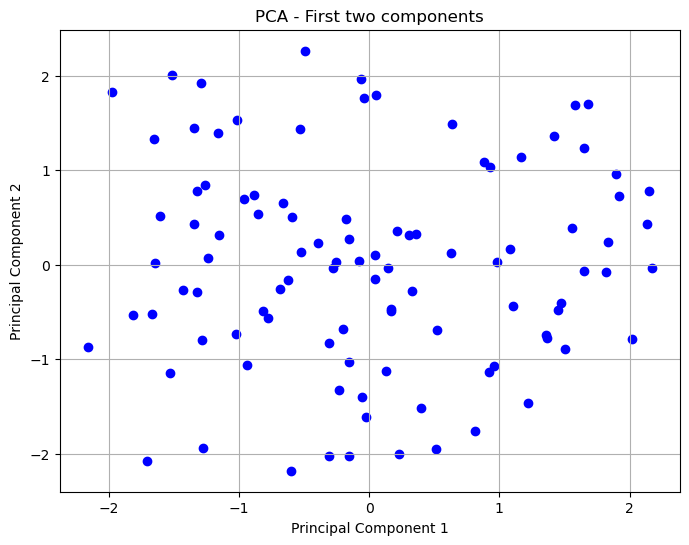

In [250]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Example dataset
# Let's assume X is your dataset (with features as columns)
X = np.random.rand(100, 5)  # Example data: 100 samples, 5 features

# Step 1: Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Step 3: Explained Variance
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')

# Step 4: Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First two components')
plt.grid(True)
plt.show()

Most important component index: 0
Explained variance ratio: 0.1402
Most important component (coefficients): [ 0.14470384  0.29211161  0.06114868  0.52734835  0.0122388  -0.40008307
  0.44282044  0.06236228  0.14567011  0.18301904 -0.22535118  0.38236372]


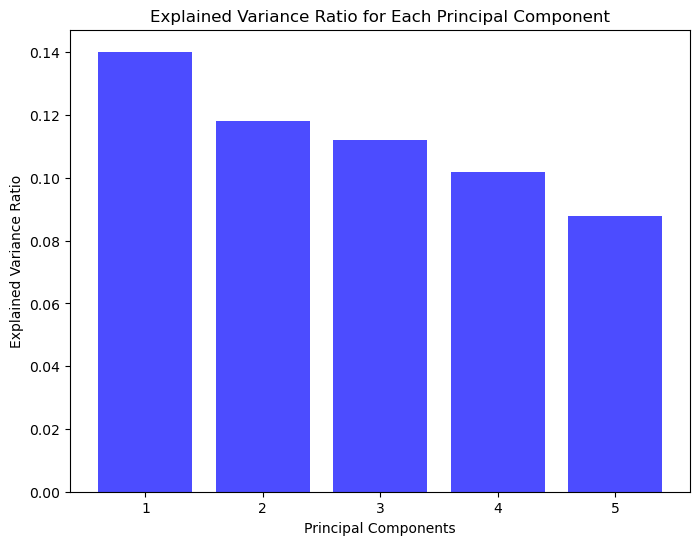

In [260]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Example dataset (100 samples, 5 features)
X = np.random.rand(100, 5)

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA(n_components=5)  # Set to the number of features or desired components
X_pca = pca.fit_transform(X_scaled)

# Step 3: Explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Step 4: Identify the most important component (one with the highest explained variance)
most_important_component_index = np.argmax(explained_variance_ratio)
most_important_component = pca.components_[most_important_component_index]

# Print the most important component
print(f"Most important component index: {most_important_component_index}")
print(f"Explained variance ratio: {explained_variance_ratio[most_important_component_index]:.4f}")
print(f"Most important component (coefficients): {most_important_component}")

# Plot the explained variance for all components
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, color='blue')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()


## Logistic Regression with Penalization (LASSO – L1 norm)

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LASSO Logistic Regression
lasso_model = LogisticRegression(
    penalty='l1',
    solver='saga',           # SAGA supports L1 penalty
    C=1.0,                   # Inverse of regularization strength
    max_iter=10000,
    class_weight='balanced',
    random_state=42
)

lasso_model.fit(X_train, y_train)  # where X_train is a DataFrame, not a NumPy array

# Predict and evaluate
y_pred_lasso = lasso_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lasso))

              precision    recall  f1-score   support

           0       0.80      0.51      0.63      8421
           1       0.27      0.59      0.37      2583

    accuracy                           0.53     11004
   macro avg       0.54      0.55      0.50     11004
weighted avg       0.68      0.53      0.57     11004



C:\Users\g.bouwou\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


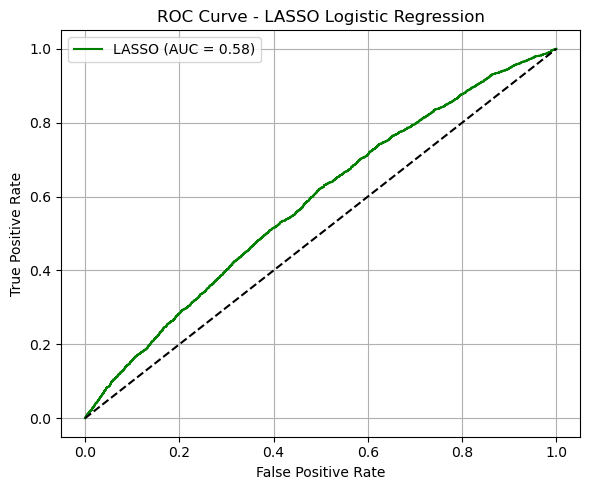

In [180]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# ROC Curve
y_proba_lasso = lasso_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_lasso)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"LASSO (AUC = {roc_auc:.2f})", color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LASSO Logistic Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [181]:
# Feature importance (non-zero coefficients)
coef = lasso_model.coef_[0]
feature_names = X.columns if hasattr(X, 'columns') else [f'X{i}' for i in range(X.shape[1])]
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coef
})
coef_df['abs_coefficient'] = coef_df['coefficient'].abs()

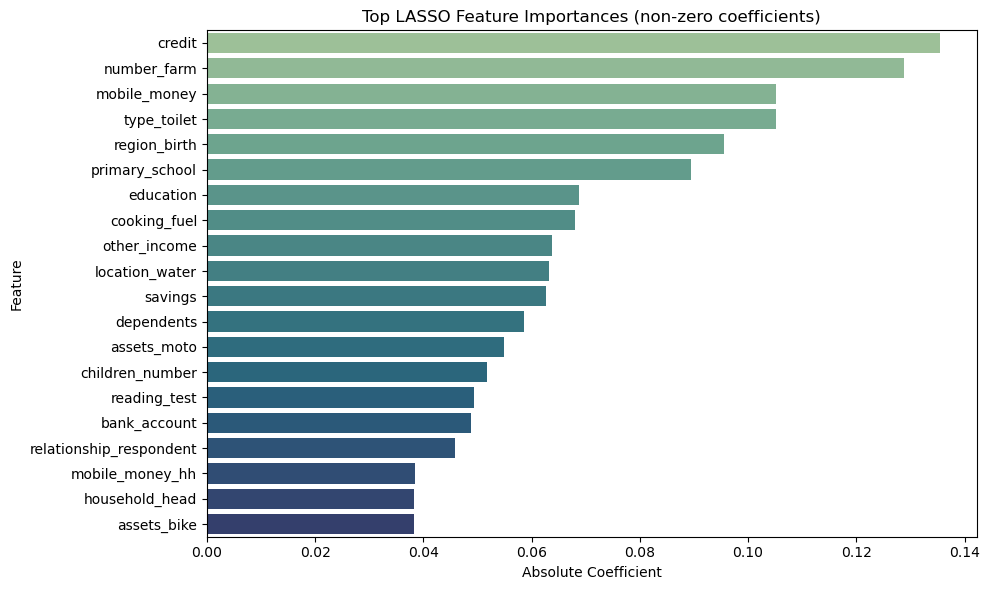

In [182]:
# Keep non-zero coefficients only
nonzero_coef_df = coef_df[coef_df['coefficient'] != 0].sort_values(by='abs_coefficient', ascending=False)

# Plot top features
plt.figure(figsize=(10, 6))
sns.barplot(data=nonzero_coef_df.head(20), x='abs_coefficient', y='feature',hue='feature', palette='crest',legend=False)
plt.title("Top LASSO Feature Importances (non-zero coefficients)")
plt.xlabel("Absolute Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## The XGBoost model

In [184]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# XGBoost classifier without deprecated parameter
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.77      0.99      0.87      8421
           1       0.68      0.05      0.10      2583

    accuracy                           0.77     11004
   macro avg       0.73      0.52      0.48     11004
weighted avg       0.75      0.77      0.69     11004



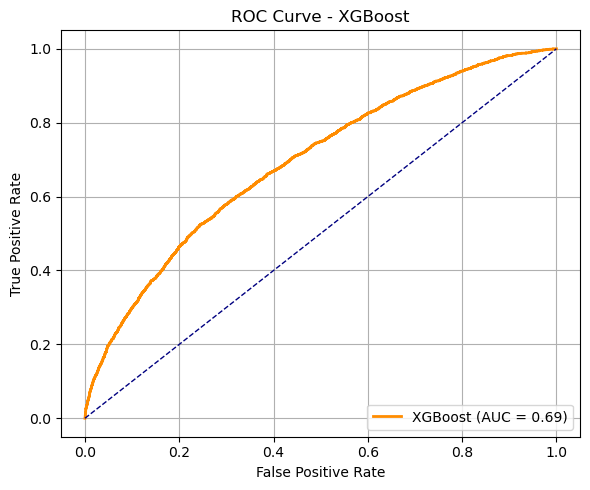

In [185]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities (class 1)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

In [186]:
# Assuming X is your preprocessed and encoded feature matrix and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert the data to DMatrix (a format XGBoost uses for training)
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=X.columns.tolist())
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=X.columns.tolist())

# Train the XGBoost model
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
y_pred = model.predict(dtest)


In [187]:
y_pred

array([0.04351355, 0.26677   , 0.14315009, ..., 0.15656899, 0.09277672,
       0.13850424], dtype=float32)

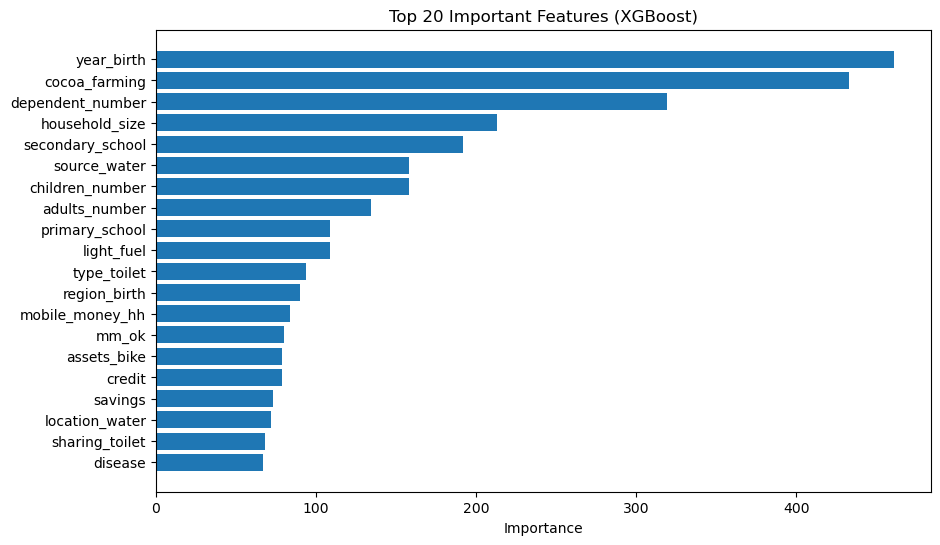

In [188]:
import matplotlib.pyplot as plt

# Get feature importance from the trained XGBoost model
importance = model.get_score(importance_type='weight')

# Convert the feature importance into a DataFrame
importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance'])

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot top 20 most important features
top_features = importance_df.head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 20 Important Features (XGBoost)')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


In [189]:
X.cocoa_farming

0        1999
1        1985
2        2005
3        1995
4        2001
         ... 
36672    2008
36673    2010
36674    2004
36675    1997
36676    2010
Name: cocoa_farming, Length: 36677, dtype: int32

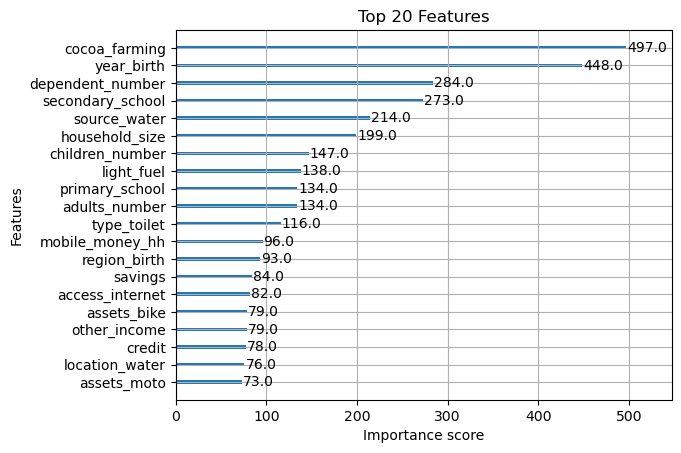

In [190]:
# Plot feature importance
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=20, title="Top 20 Features")
plt.show()

In [191]:
print(top_features)

             Feature  Importance
3         year_birth       461.0
11     cocoa_farming       433.0
15  dependent_number       319.0
13    household_size       213.0
48  secondary_school       192.0
29      source_water       158.0
19   children_number       158.0
17     adults_number       134.0
47    primary_school       109.0
34        light_fuel       109.0
31       type_toilet        94.0
5       region_birth        90.0
25   mobile_money_hh        84.0
26             mm_ok        80.0
42       assets_bike        79.0
28            credit        79.0
27           savings        73.0
30    location_water        72.0
32    sharing_toilet        68.0
46           disease        67.0


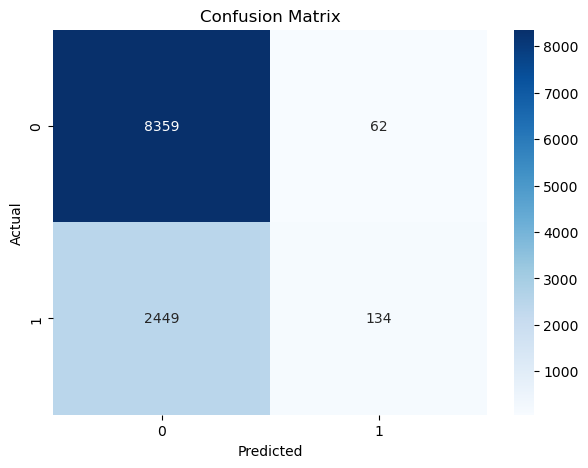

In [192]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## The LGBM model

In [194]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [195]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
lgb_model = lgb.LGBMClassifier(class_weight='balanced', random_state=42)
lgb_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 6000, number of negative: 19673
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 367
[LightGBM] [Info] Number of data points in the train set: 25673, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


LGBMClassifier(class_weight='balanced', random_state=42)

In [196]:
# Predict and evaluate the model
y_pred = lgb_model.predict(X_test)
y_pred_prob = lgb_model.predict_proba(X_test)[:, 1]  # Probability for the positive class


In [197]:
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [198]:
y_pred_prob

array([0.33984538, 0.58302945, 0.45028776, ..., 0.43166451, 0.27917271,
       0.56041482])

In [199]:
# Print classification report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.84      0.68      0.75      8421
           1       0.36      0.59      0.45      2583

    accuracy                           0.66     11004
   macro avg       0.60      0.63      0.60     11004
weighted avg       0.73      0.66      0.68     11004



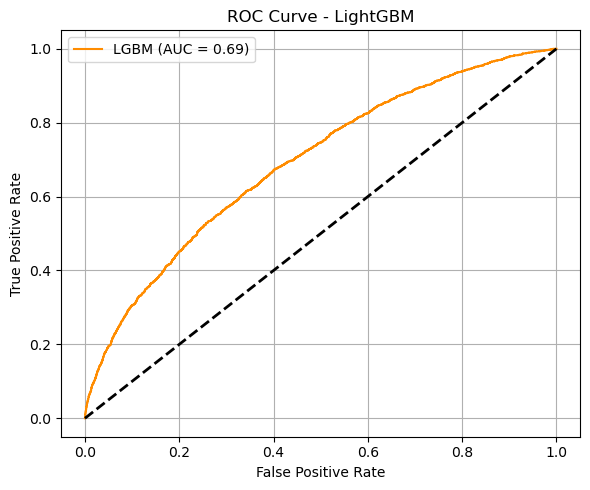

In [200]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class
y_prob = lgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"LGBM (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [201]:
# Feature importances
importances = lgb_model.feature_importances_

In [202]:
assert len(importances) == X.shape[1], f"{len(importances)} importances vs {X.shape[1]} feature names"

In [203]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})


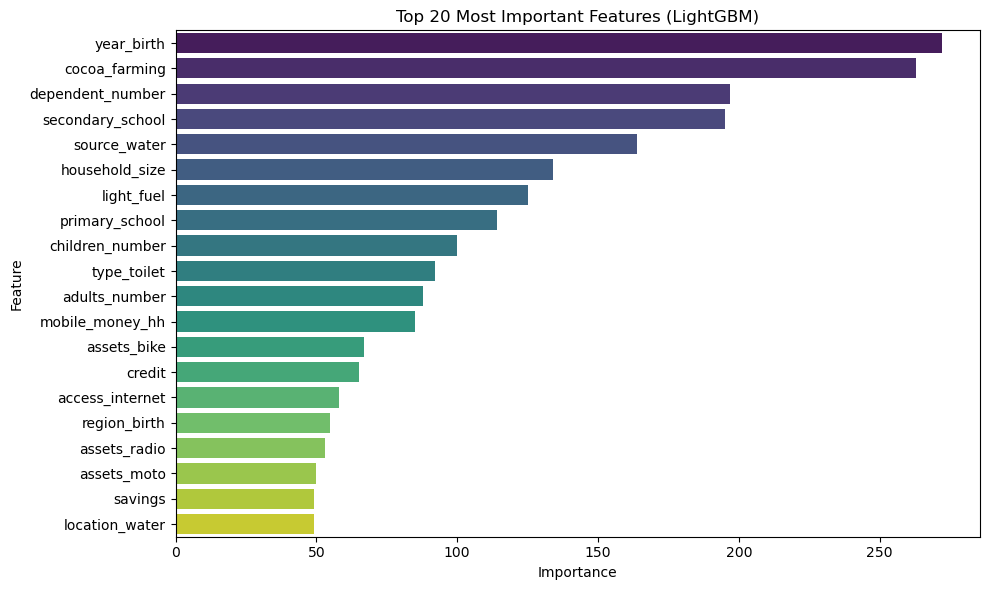

In [204]:
# Plot top features
top_features = importance_df.sort_values(by='importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='importance', y='feature', hue= 'feature', palette='viridis', legend=False)
plt.title("Top 20 Most Important Features (LightGBM)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## The Logistic Regression Model

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Fit logistic regression
model = LogisticRegression(max_iter=5000, solver='saga', class_weight='balanced')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.56      0.66      8421
           1       0.28      0.55      0.37      2583

    accuracy                           0.56     11004
   macro avg       0.54      0.56      0.51     11004
weighted avg       0.68      0.56      0.59     11004



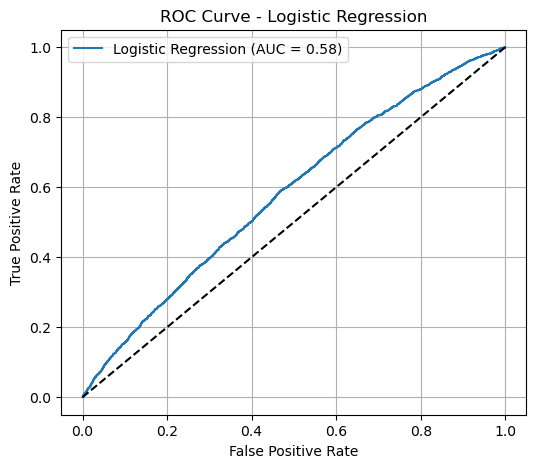

In [219]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


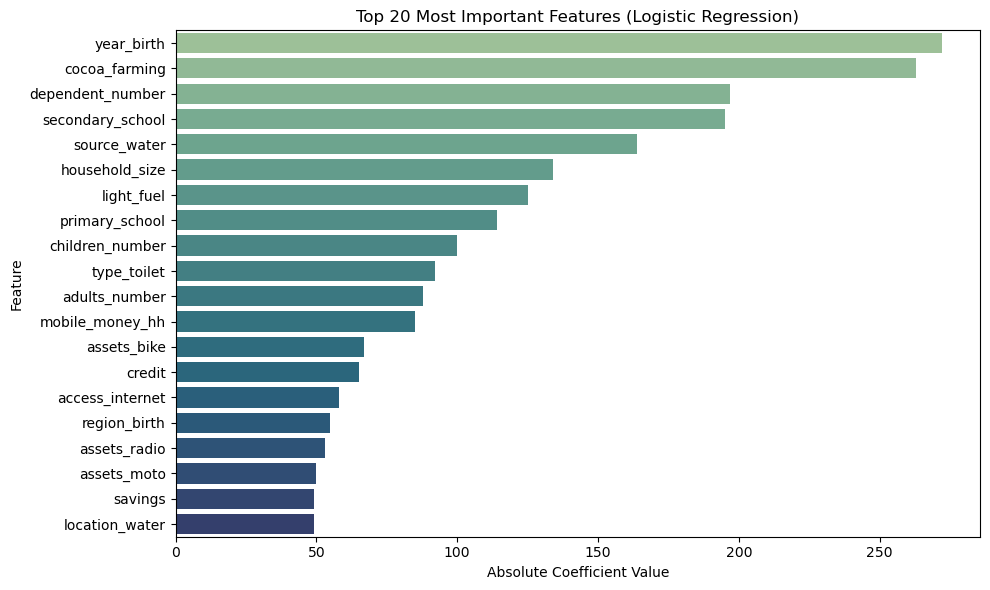

In [226]:
# Sort and plot
top_features = top_features.sort_values(by='importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='importance', y='feature', hue= 'feature', palette='crest', legend=False)
plt.title("Top 20 Most Important Features (Logistic Regression)")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## The Random forest Model

In [228]:
# Train the model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]


In [229]:
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"ROC AUC Score: {auc_rf:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      8421
           1       0.64      0.09      0.16      2583

    accuracy                           0.77     11004
   macro avg       0.71      0.54      0.51     11004
weighted avg       0.75      0.77      0.70     11004

ROC AUC Score: 0.71


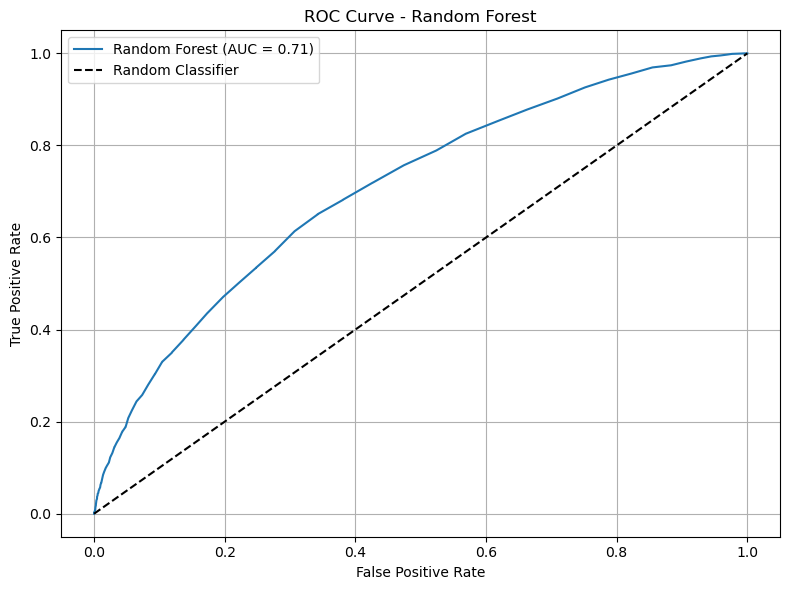

In [230]:
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


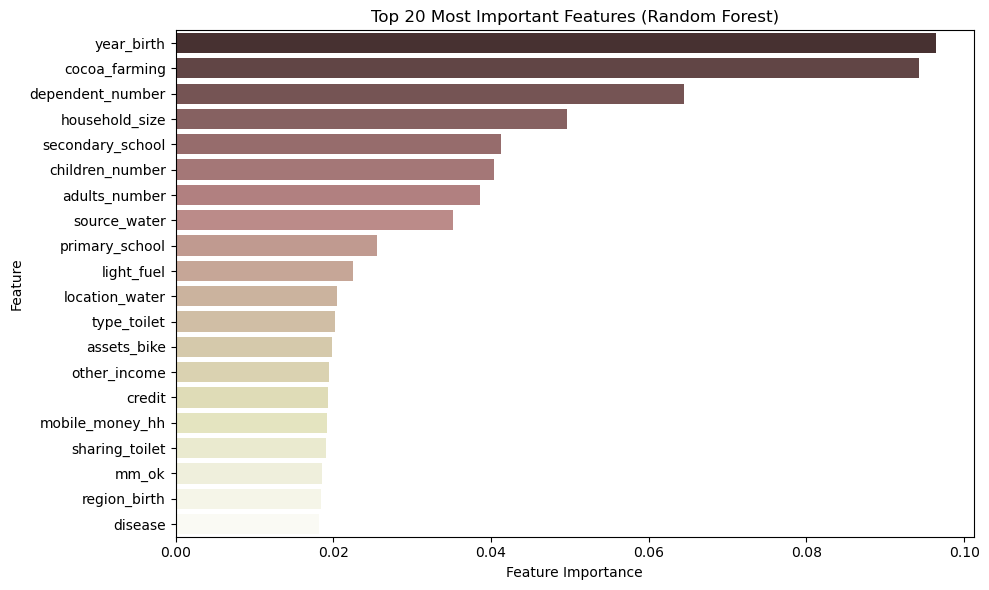

In [234]:
# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({
    'feature': X.columns,      # Make sure X is a DataFrame; otherwise use a list of feature names
    'importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)


# Plot top 20
plt.figure(figsize=(10, 6))
sns.barplot(
    data=feature_importance_df.head(20),
    x='importance',
    y='feature', hue='feature',
    palette='pink',legend=False
)
plt.title("Top 20 Most Important Features (Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
!pip install catboot

## The CatBoost Model

In [241]:
from catboost import CatBoostClassifier, Pool
import pandas as pd

# Example dataset with some categorical features
# Assuming X_train is a pandas DataFrame with your features

# Specify categorical features (replace with your actual column names or indices)
categorical_features_indices = [0, 1]  # Replace with actual indices of categorical columns

# Define the model
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    cat_features=categorical_features_indices,  # List of categorical feature indices
    verbose=100,
    random_state=42
)

# Fit the model (assuming X_train and y_train are already defined)
model.fit(X_train, y_train)


CatBoostError: 'data' is numpy array of floating point numerical type, it means no categorical features, but 'cat_features' parameter specifies nonzero number of categorical features

In [236]:
from catboost import CatBoostClassifier, Pool

# Define the model
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    cat_features=categorical_features_indices,
    verbose=100,
    random_state=42
)

NameError: name 'categorical_features_indices' is not defined

In [ ]:
# Fit the model
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)

In [ ]:
# Predict probabilities and evaluate
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {roc_auc:.2f}")

In [ ]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'CatBoost (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CatBoost')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Feature Importance Plot
importances = model.get_feature_importance()
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='importance', y='feature', hue='feature', palette='viridis', legend=False)
plt.title('Top 20 Feature Importances (CatBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
# Train SVM with probability estimates
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

In [ ]:
# Predict probabilities
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"SVM AUC Score: {roc_auc:.2f}")

# Plot ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## The Gradient Boosting Model

Gradient Boosting AUC Score: 0.65


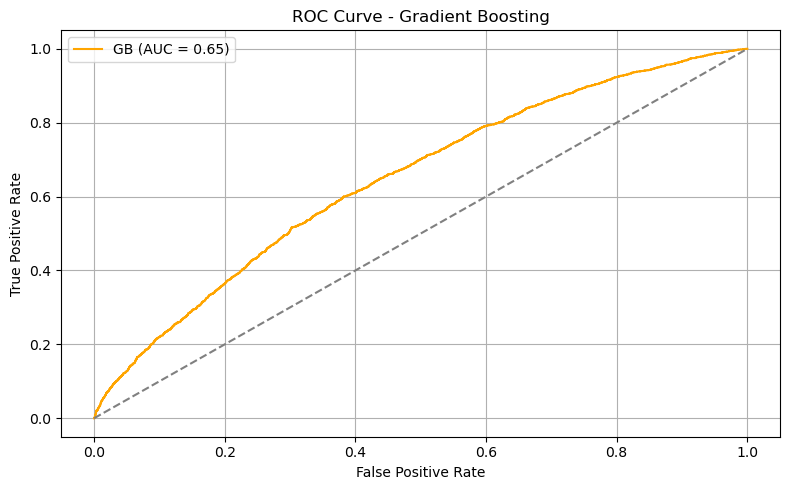

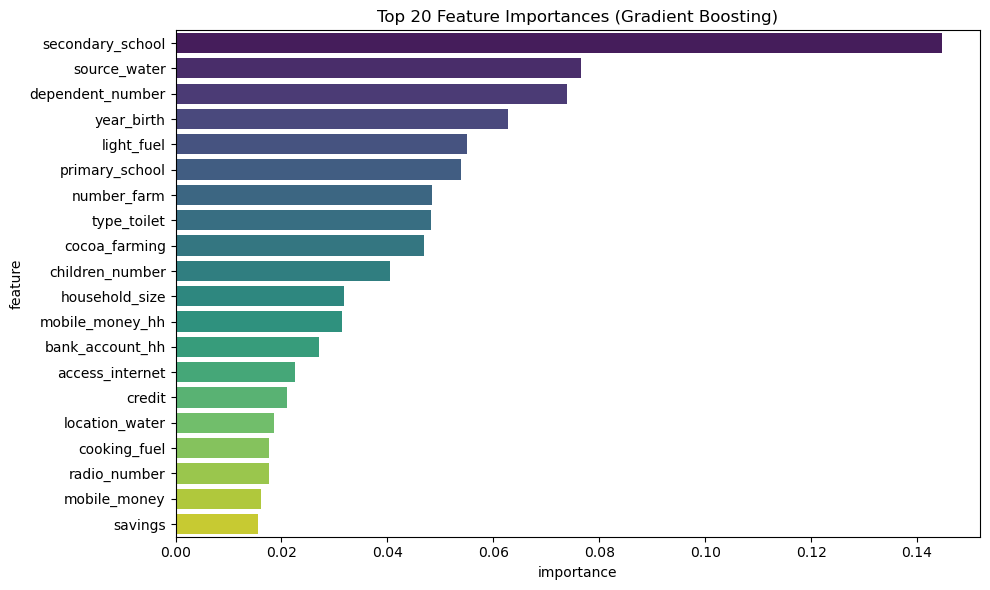

In [248]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns

# Train GB model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = gb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Gradient Boosting AUC Score: {roc_auc:.2f}")

# Plot ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'GB (AUC = {roc_auc:.2f})', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Importance
importances = gb_model.feature_importances_
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='importance', y='feature', hue = 'feature', palette='viridis', legend=False)
plt.title('Top 20 Feature Importances (Gradient Boosting)')
plt.tight_layout()
plt.show()


## The Neural Network Classifier

MLP AUC Score: 0.62


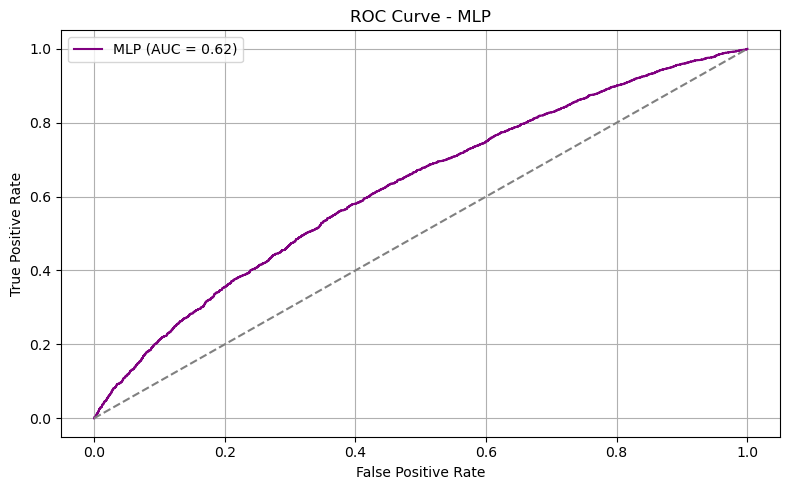

In [246]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, roc_curve

# Train MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = mlp_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"MLP AUC Score: {roc_auc:.2f}")

# Plot ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'MLP (AUC = {roc_auc:.2f})', color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# After prediction
preds = model.predict(X)

# Combine with household IDs
results = pd.DataFrame({
    'farmer_code': household_ids,
    'predicted_child_labor': preds
})
